# ДЗ №1 - обучение модели линейной регресии методом градиентного спуска

Реализовать обучение модели линейной регрессии методом градиентного спуска.<br />

В качестве подводящего упражнения в этом задании предлагается реализовать функции потерь и саму модель линейной регрессии в манере, схожей с построением модулей фреймворка pytorch (см. пояснения в шаблонах кода)

В решении ожидается наличие следующих ключевых составляющих:<br />

#### Текстовое описание в решении:
- формулировка задачи, формулировка признакового описания объектов, формулировка функции ошибки, формулировка меры качества модели;
- исследование исходных данных на предмет скоррелированности признаков; фильтрация признаков; порождение признаков (при необходимости);
- оценка параметров модели линейной регрессии (обучение модели) методом градиентного спуска;
- оценка качества модели на валидационной выборке.

#### Код решения:
(используйте предлагаемые шаблоны)
- формулировка модели линейной регрессии;
- формулировка функции ошибки;
- формулировка метрики (метрик);
- формулировка цикла оптимизации параметров.


#### Визуализация в решении:
- распределение признаков;
- распределение целевой переменной;
- эволюция функции ошибки и выбранных метрик качества по ходу обучения.

#### Выводы (в форме текста!)
- вывод о том, насколько модель подходит для описания данных
- вывод о достаточности или избыточности данных для оценки параметров модели
- вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения).

Примечания:<br />
Допустимо порождение признаков (полиномиальных, экспоненциальных, логарифмических, etc.)<br />
Реализация линейной регрессии может быть написана только с использованием библиотеки Numpy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.<br />
Из готовых реализаций (напр., из пакета scikit-learn) в этом задании допускается использовать только порождение полиномиальных признаков `PolynomialFeatures`.

Данные находятся в следующих файлах:

Признаковое описание объектов обучающей выборки - в файле X_train.npy

Значения целевой переменной на обучающей выборке - в файле y_train.npy

Способ чтения данных из файлов *.npy :

```
import numpy as np
data = np.load('/path/to/filename.npy')
```

### Примечание на предмет реализации градиента функции потерь

Нелишним будет вспомнить способ вычисления градиента сложной функции. Здесь функция ошибки (обозначено как $\mathscr{L}$) представлена как сложная функция $\mathscr{L}\left( G\left( \theta \right) \right)$. Для простоты приведена сразу матричная запись.

$$
\nabla_{\theta}{\mathscr{L}} = \nabla_{\theta}{G}\cdot\left(\nabla_{G}{\mathscr{L}}\right)
$$

В качестве шпаргалки можно подсмотреть правила матричного дифференцирования <a href="https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf">здесь</a>

Например, в случае функции потерь MSE это может выглядеть следующим образом:

$$
\nabla_{\theta}{\mathscr{L}} = X^T\cdot2\left(X\theta - Y\right)
$$


При этом логически имеет смысл реализовать компоненту градиента, относящуюся собственно к функции потерь $\nabla_{G}{\mathscr{L}}$ - в коде класса функции потерь, а компоненту, относящуюся к модели $\nabla_{\theta}{G}$ - в коде модели.

Именно поэтому классы `loss` и `linear_regression` в предложенном шаблоне реализованы наследующими `Differentiable` - для общности восприятия этих модулей как дифференцируемых по своим аргументам.

# Моё решение

__Формулировка задачи__

Написание модели линейной регрессии и обучение с помощью градиентного спуска, конкретное описание будет ниже в ходе решения

# !!!
Не разбил на тест, трейн и валидацию

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [ ]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [274]:
np.random.seed(11)

In [294]:
Xtr = np.load('./X_train.npy')
ytr = np.load('./y_train.npy')

Для начала проверим размерность нашего датасета

In [295]:
Xtr.shape

(10000, 4)

In [19]:
ytr.shape

(10000, 1)

Получается, наша функция является функцией от 4х переменных: f(x1,x2,x3,x4)

Поисследуем исхлдные данные. Посмотрим, как они скоррелированы друг с другом, как распределены. Визуализируем это

Чтобы проделать эту работу, сохраним наши данные в формате 'csv'

In [302]:
np.savetxt("hw1.csv", Xtr, delimiter=",")

С помощью библиотеки pandas прочитаем сохранённый

In [303]:
df = pd.read_csv("hw1.csv", header=0, names=['1', '2', '3', '4'])
df.head() # проверили, что сохранили и считали заново корректно

1         2          3           4
0 -5.411598 -5.495438  29.285391 -158.480757
1 -4.299786 -4.594803  18.488158  -79.495119
2 -6.005137 -5.921348  36.061665 -216.555224
3 -6.420339 -6.364172  41.220748 -264.651158
4 -4.238141 -4.258125  17.961839  -76.124808

Посмортим на корреляцию признаков и визуализируем её

In [239]:
df.corr()

1         2         3         4
1  1.000000  0.999308  0.009216  0.881009
2  0.999308  1.000000  0.009652  0.880313
3  0.009216  0.009652  1.000000  0.018993
4  0.881009  0.880313  0.018993  1.000000

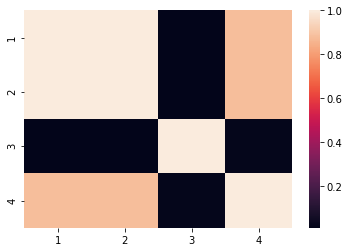

In [240]:
sns.heatmap(df.corr())

Построили матрицу корреляции и диаграмку: на ней чем светлее цвет, тем более скоррелированны признаки. Видим, что 1ый и 2ой признаки очень скоррелированны, с коэффициентом практически 1. Также достаточно сильно скоррелированы 1-2 и 4ый признаки. 3ий признак хороший и он не с какими на коррелируется

Посмотрим, как теперь распределены значения x в каждом из 4х признаков. Для этого построим следующие диаграмы: 

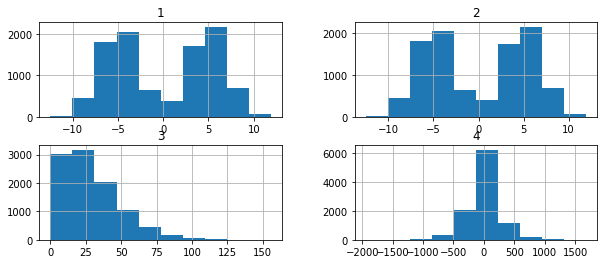

In [241]:
features = ['1', '2', '3', '4']
df[features].hist(figsize=(10, 4));

Видим, что большие значения x есть только в 4ом признаке, но их мало. Основная часть расположена в районе 0. Первый от второго признака не отличаются (этот же вывод сделали из коррелиционной матрицы), поэтому на этом этапе понимаю, что либо 1ый либо 2ой признак можно удалить. 

Построим ещё плотности распределения x у каждого признака.

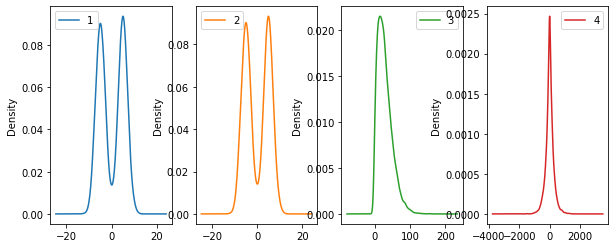

In [242]:
df[features].plot(kind='density', subplots=True, layout=(1, 4), 
                  sharex=False, figsize=(10, 4));

Отсюда делаем такие же выводы, как и из гистограмм выше

Теперь посмотрим на распределение y для этого также сохраним значения в расширении csv

In [220]:
np.savetxt("hw1y.csv", ytr, delimiter=",")

In [234]:
df_y = pd.read_csv("hw1y.csv", header=0, names=['1'])
df_y.head()

1
0  9.998146
1  9.279000
2  8.634806
3  9.567111
4  8.301879

Строим диаграмму как распределён y 

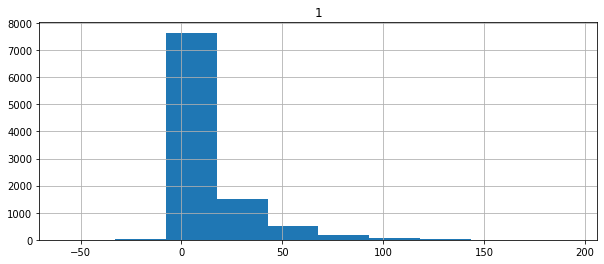

In [235]:
features = ['1']
df_y[features].hist(figsize=(10, 4));

И ещё плотность распределения

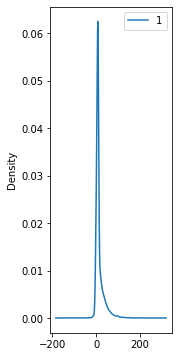

In [236]:
df_y[features].plot(kind='density', subplots=True, layout=(1, 4), 
                  sharex=False, figsize=(10, 6));

Из плотности мало что видно... из диаграммы делаем вывод, y в основном расположен в районе 0, но есть и большие значения, но значения x маленькие, как мы видели выше (во всех признаках, кроме 4го нет больших значений x), поэтому коэффициенты при обучении могут получаться большими, что не очень

Удалим 1ый признак, так как мы выяснили, что он практически совпадает со вторым

In [304]:
df.head()

1         2          3           4
0 -5.411598 -5.495438  29.285391 -158.480757
1 -4.299786 -4.594803  18.488158  -79.495119
2 -6.005137 -5.921348  36.061665 -216.555224
3 -6.420339 -6.364172  41.220748 -264.651158
4 -4.238141 -4.258125  17.961839  -76.124808

In [352]:
df.drop(df.columns[[0]], axis='columns', inplace=True)

In [353]:
df.head()

2          3           4
0 -5.495438  29.285391 -158.480757
1 -4.594803  18.488158  -79.495119
2 -5.921348  36.061665 -216.555224
3 -6.364172  41.220748 -264.651158
4 -4.258125  17.961839  -76.124808

Также удалим в numpy массиве и будем в обучении использовать его

In [309]:
X_without_feature = np.delete(Xtr, 0, axis=1)

In [310]:
X_without_feature.shape

(10000, 3)

Получили 3 признака, без 1го

После работы с датасетом реализуем линейную регрессию и напишем градиентный спуск

In [3]:
class Differentiable:
    def __init__(self):
        pass
    
    def forward(self, **kwargs):
        raise NotImplementedError()
    
    def backward(self, **kwargs):
        raise NotImplementedError()

Описание действий в комментариях к коду

Функция ошибки - $$MSE = \sum\limits_{1}^n (y\_pred - y\_true)^2$$

Использую метрику $$\frac{1}{n} \times \sum\limits_{1}^n (y\_pred - y\_true)^2$$

То есть тот же MSE толко поделённый на количество точек в y (среднеквадратичная ошибка, которая приходит конкретно на одну точку)

In [327]:
def Metric(X, ytr, lr_model): 
    return (lr_model(X) - ytr).T.dot((lr_model(X) - ytr))/ytr.shape[0]

In [4]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
    
    def forward(self, y_pred, y_true, theta):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        loss_value = 0.0
        loss_value = (y_pred - y_true).T.dot((y_pred - y_true))# функция ошибки - MSE = (X*Theta - y_true)^2   
        loss_value += theta**2 #!!! так как используем L2 регуляризацию
        return loss_value
    
    
    def backward(self, y_pred, y_true):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента y_pred
        
        partial_grad = np.zeros_like(y_pred-y_true)
        partial_grad = 2 * (y_pred-y_true) # считаем часть градиента, которая относиться к лосс функции
        return partial_grad

Делаем L2 регуляризацию, то есть к лосс функции добавляем квадрат весов, получаем:
$$\sum\limits_{1}^n (y\_pred - y\_true)^2 + w^2 $$

In [5]:
class linear_regression(Differentiable):
    def __init__(self):
        super(linear_regression, self).__init__()
        self.theta = None
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, X, loss_backward):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        partial_grad = 0.0
        partial_grad = X.T.dot(loss_backward) # считаем градиент, который принадлежит именно нашей моделе
        partial_grad += 2 * self.theta # делаем L2 регуляризацию, для того, чтобы 'штрафовать' большие значения параметров 
                                        # они могут возникать из анализа признаков
        return partial_grad
    
    def forward(self, X):
        # этот метод предназначен для применения модели к данным
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X
            self.theta = 0.0
            # Инициализируем веса случайны образом scale - отклонение
            # !!! исправил инициализацию
            self.theta = np.random.normal(scale=0.01, size = (X.shape[1], 1)) # более хорошая инициализация нормальным распределением
            #self.theta = np.zeros((X.shape[1], 1)) # простоая первоначальная инициализация параметров нулями
        
        
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        y_pred = 0.0
        y_pred = X.dot(self.theta)
        return y_pred

Задаём шаг градиентного спуска (коэффициенты в процессе обучения все равно большие, поэтому lr такой маленький, при больших значениях начинает расходиться)

In [271]:
lr = 10e-10

In [339]:
def train_loop(X, y, model, loss_fn, epochs=100):
    loss_history = []
    metric_history = []
    pbar = tqdm(total=epochs)
    for epoch in range(epochs):
        # В этом цикле следует реализовать итеративную процедуру оптимизации параметров модели model,
        #        руководствуясь функцией потерь loss_fn
        

        grad = 0.0
        loss_backward = 0.0
        
        
        y_pred = model(X) # получили y_pred, что предсказала наша модель
        loss_value = loss_fn.forward(y_pred, y)[0][0] # получили значение loss функции
        loss_backward = loss_fn.backward(y_pred, y) # подсчитали градиент в лоссе
        grad = model.backward(X, loss_backward) # подсчитали полный гадиент
        model.theta = model.theta - lr * grad # сделали градиентный шаг
        
        loss_history.append(loss_value)
        metric_history.append(Metric(X, y, model)[0][0])
        pbar.update(1)
        pbar.set_postfix({'loss': loss_value})
    pbar.close()
    return loss_history, metric_history

Чтобы у нас был bias Добавим к X ещё одну колонку, которая во всех значениях равна 1 и увеличили размер параметров на 1

In [329]:
bias = np.ones((X_without_feature.shape[0], 1))
X = np.hstack((X_without_feature, bias))

Обучаем, созданную нами модель 10000 эпох

In [340]:
obj_fn = loss()
lr_model = linear_regression()
loss_history, metric_history = train_loop(X, ytr, lr_model, obj_fn, epochs=10000)










  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]








  0%|                                                                 | 1/10000 [00:00<00:29, 336.22it/s, loss=5.71e+6]








  0%|                                                                 | 2/10000 [00:00<00:34, 287.18it/s, loss=3.68e+6]








  0%|                                                                  | 3/10000 [00:00<00:39, 251.03it/s, loss=3.2e+6]








  0%|                                                                 | 4/10000 [00:00<00:39, 250.93it/s, loss=2.99e+6]








  0%|                                                                 | 5/10000 [00:00<00:37, 264.10it/s, loss=2.84e+6]








  0%|                                                                 | 6/10000 [00:00<00:38, 261.78it/s, loss=2.71e+6]








  0%|                                                                 | 7/10000 [00:00<00:38, 2

  1%|▍                                                               | 62/10000 [00:00<00:40, 242.78it/s, loss=2.88e+5]








  1%|▍                                                               | 63/10000 [00:00<00:40, 242.78it/s, loss=2.81e+5]








  1%|▍                                                               | 64/10000 [00:00<00:40, 242.78it/s, loss=2.74e+5]








  1%|▍                                                               | 65/10000 [00:00<00:40, 242.78it/s, loss=2.67e+5]








  1%|▍                                                               | 66/10000 [00:00<00:40, 242.78it/s, loss=2.61e+5]








  1%|▍                                                               | 67/10000 [00:00<00:40, 242.78it/s, loss=2.55e+5]








  1%|▍                                                               | 68/10000 [00:00<00:40, 242.78it/s, loss=2.49e+5]








  1%|▍                                                               | 69/10000 [00:00<00:40, 242.78it/s

  2%|█▏                                                             | 185/10000 [00:00<00:42, 230.84it/s, loss=1.37e+5]








  2%|█▏                                                             | 186/10000 [00:00<00:42, 230.84it/s, loss=1.37e+5]








  2%|█▏                                                             | 187/10000 [00:00<00:42, 230.84it/s, loss=1.37e+5]








  2%|█▏                                                             | 188/10000 [00:00<00:42, 231.67it/s, loss=1.37e+5]








  2%|█▏                                                             | 188/10000 [00:00<00:42, 231.67it/s, loss=1.37e+5]








  2%|█▏                                                             | 189/10000 [00:00<00:42, 231.67it/s, loss=1.37e+5]








  2%|█▏                                                             | 190/10000 [00:00<00:42, 231.67it/s, loss=1.37e+5]








  2%|█▏                                                             | 191/10000 [00:00<00:42, 231.67it/s

  3%|█▉                                                             | 307/10000 [00:01<00:41, 232.83it/s, loss=1.33e+5]








  3%|█▉                                                             | 308/10000 [00:01<00:41, 232.83it/s, loss=1.33e+5]








  3%|█▉                                                             | 309/10000 [00:01<00:41, 232.83it/s, loss=1.33e+5]








  3%|█▉                                                             | 310/10000 [00:01<00:41, 232.83it/s, loss=1.33e+5]








  3%|█▉                                                             | 311/10000 [00:01<00:41, 232.83it/s, loss=1.33e+5]








  3%|█▉                                                             | 312/10000 [00:01<00:41, 232.83it/s, loss=1.33e+5]








  3%|█▉                                                             | 313/10000 [00:01<00:41, 232.83it/s, loss=1.32e+5]








  3%|█▉                                                             | 314/10000 [00:01<00:41, 232.83it/s

  4%|██▋                                                            | 430/10000 [00:01<00:43, 220.41it/s, loss=1.29e+5]








  4%|██▋                                                            | 431/10000 [00:01<00:43, 220.41it/s, loss=1.29e+5]








  4%|██▋                                                            | 432/10000 [00:01<00:43, 220.41it/s, loss=1.29e+5]








  4%|██▋                                                            | 433/10000 [00:01<00:43, 220.41it/s, loss=1.29e+5]








  4%|██▋                                                            | 434/10000 [00:01<00:43, 220.41it/s, loss=1.29e+5]








  4%|██▋                                                            | 435/10000 [00:01<00:43, 220.41it/s, loss=1.29e+5]








  4%|██▋                                                            | 436/10000 [00:01<00:43, 220.41it/s, loss=1.29e+5]








  4%|██▊                                                            | 437/10000 [00:01<00:43, 220.41it/s

  6%|███▍                                                           | 553/10000 [00:02<00:40, 231.22it/s, loss=1.25e+5]








  6%|███▍                                                           | 554/10000 [00:02<00:40, 231.22it/s, loss=1.25e+5]








  6%|███▍                                                           | 555/10000 [00:02<00:40, 231.22it/s, loss=1.25e+5]








  6%|███▌                                                           | 556/10000 [00:02<00:40, 231.22it/s, loss=1.25e+5]








  6%|███▌                                                           | 557/10000 [00:02<00:40, 231.22it/s, loss=1.25e+5]








  6%|███▌                                                           | 558/10000 [00:02<00:40, 231.22it/s, loss=1.25e+5]








  6%|███▌                                                           | 559/10000 [00:02<00:40, 231.22it/s, loss=1.25e+5]








  6%|███▌                                                           | 560/10000 [00:02<00:40, 231.22it/s

  7%|████▎                                                          | 676/10000 [00:02<00:39, 235.95it/s, loss=1.21e+5]








  7%|████▎                                                          | 677/10000 [00:02<00:39, 235.95it/s, loss=1.21e+5]








  7%|████▎                                                          | 678/10000 [00:02<00:39, 235.95it/s, loss=1.21e+5]








  7%|████▎                                                          | 679/10000 [00:02<00:39, 235.95it/s, loss=1.21e+5]








  7%|████▎                                                          | 680/10000 [00:02<00:39, 235.95it/s, loss=1.21e+5]








  7%|████▎                                                          | 681/10000 [00:02<00:39, 235.95it/s, loss=1.21e+5]








  7%|████▎                                                          | 682/10000 [00:02<00:39, 235.95it/s, loss=1.21e+5]








  7%|████▎                                                          | 683/10000 [00:02<00:39, 235.95it/s

  8%|█████                                                          | 799/10000 [00:03<00:41, 220.20it/s, loss=1.18e+5]








  8%|█████                                                          | 800/10000 [00:03<00:41, 220.20it/s, loss=1.18e+5]








  8%|█████                                                          | 801/10000 [00:03<00:41, 220.20it/s, loss=1.18e+5]








  8%|█████                                                          | 802/10000 [00:03<00:41, 220.20it/s, loss=1.18e+5]








  8%|█████                                                          | 803/10000 [00:03<00:41, 220.20it/s, loss=1.18e+5]








  8%|█████                                                          | 804/10000 [00:03<00:41, 220.20it/s, loss=1.18e+5]








  8%|█████                                                          | 805/10000 [00:03<00:41, 220.20it/s, loss=1.18e+5]








  8%|█████                                                          | 806/10000 [00:03<00:41, 220.20it/s

  9%|█████▊                                                         | 922/10000 [00:04<00:39, 228.91it/s, loss=1.14e+5]








  9%|█████▊                                                         | 923/10000 [00:04<00:39, 228.91it/s, loss=1.14e+5]








  9%|█████▊                                                         | 924/10000 [00:04<00:39, 228.91it/s, loss=1.14e+5]








  9%|█████▊                                                         | 925/10000 [00:04<00:39, 228.91it/s, loss=1.14e+5]








  9%|█████▊                                                         | 926/10000 [00:04<00:39, 228.91it/s, loss=1.14e+5]








  9%|█████▊                                                         | 927/10000 [00:04<00:39, 230.97it/s, loss=1.14e+5]








  9%|█████▊                                                         | 927/10000 [00:04<00:39, 230.97it/s, loss=1.14e+5]








  9%|█████▊                                                         | 928/10000 [00:04<00:39, 230.97it/s

 10%|██████▍                                                       | 1045/10000 [00:04<00:39, 228.03it/s, loss=1.11e+5]








 10%|██████▍                                                       | 1045/10000 [00:04<00:39, 228.03it/s, loss=1.11e+5]








 10%|██████▍                                                       | 1046/10000 [00:04<00:39, 228.03it/s, loss=1.11e+5]








 10%|██████▍                                                       | 1047/10000 [00:04<00:39, 228.03it/s, loss=1.11e+5]








 10%|██████▍                                                       | 1048/10000 [00:04<00:39, 228.03it/s, loss=1.11e+5]








 10%|██████▌                                                       | 1049/10000 [00:04<00:39, 228.03it/s, loss=1.11e+5]








 10%|██████▌                                                       | 1050/10000 [00:04<00:39, 228.03it/s, loss=1.11e+5]








 11%|██████▌                                                       | 1051/10000 [00:04<00:39, 228.03it/s

 12%|███████▏                                                      | 1167/10000 [00:05<00:38, 232.45it/s, loss=1.08e+5]








 12%|███████▏                                                      | 1168/10000 [00:05<00:37, 232.45it/s, loss=1.08e+5]








 12%|███████▏                                                      | 1169/10000 [00:05<00:37, 232.45it/s, loss=1.08e+5]








 12%|███████▎                                                      | 1170/10000 [00:05<00:37, 232.45it/s, loss=1.08e+5]








 12%|███████▎                                                      | 1171/10000 [00:05<00:37, 232.45it/s, loss=1.08e+5]








 12%|███████▎                                                      | 1172/10000 [00:05<00:37, 232.45it/s, loss=1.08e+5]








 12%|███████▎                                                      | 1173/10000 [00:05<00:37, 232.45it/s, loss=1.08e+5]








 12%|███████▎                                                      | 1174/10000 [00:05<00:37, 232.45it/s

 13%|███████▉                                                      | 1290/10000 [00:05<00:37, 232.28it/s, loss=1.05e+5]








 13%|████████                                                      | 1291/10000 [00:05<00:37, 232.28it/s, loss=1.05e+5]








 13%|████████                                                      | 1292/10000 [00:05<00:37, 232.28it/s, loss=1.05e+5]








 13%|████████                                                      | 1293/10000 [00:05<00:37, 232.28it/s, loss=1.05e+5]








 13%|████████                                                      | 1294/10000 [00:05<00:37, 232.28it/s, loss=1.05e+5]








 13%|████████                                                      | 1295/10000 [00:05<00:37, 232.28it/s, loss=1.05e+5]








 13%|████████                                                      | 1296/10000 [00:05<00:37, 232.28it/s, loss=1.04e+5]








 13%|████████                                                      | 1297/10000 [00:05<00:37, 232.28it/s

 14%|████████▊                                                     | 1413/10000 [00:06<00:36, 234.14it/s, loss=1.02e+5]








 14%|████████▊                                                     | 1414/10000 [00:06<00:36, 234.14it/s, loss=1.02e+5]








 14%|████████▊                                                     | 1415/10000 [00:06<00:36, 234.14it/s, loss=1.02e+5]








 14%|████████▊                                                     | 1416/10000 [00:06<00:36, 234.14it/s, loss=1.02e+5]








 14%|████████▊                                                     | 1417/10000 [00:06<00:36, 234.14it/s, loss=1.02e+5]








 14%|████████▊                                                     | 1418/10000 [00:06<00:36, 234.14it/s, loss=1.01e+5]








 14%|████████▊                                                     | 1419/10000 [00:06<00:36, 234.14it/s, loss=1.01e+5]








 14%|████████▊                                                     | 1420/10000 [00:06<00:36, 234.14it/s

 15%|█████████▌                                                    | 1536/10000 [00:06<00:37, 226.09it/s, loss=9.87e+4]








 15%|█████████▌                                                    | 1537/10000 [00:06<00:37, 226.09it/s, loss=9.87e+4]








 15%|█████████▌                                                    | 1538/10000 [00:06<00:37, 226.09it/s, loss=9.86e+4]








 15%|█████████▌                                                    | 1539/10000 [00:06<00:37, 226.09it/s, loss=9.86e+4]








 15%|█████████▌                                                    | 1540/10000 [00:06<00:37, 226.09it/s, loss=9.86e+4]








 15%|█████████▌                                                    | 1541/10000 [00:06<00:37, 226.09it/s, loss=9.86e+4]








 15%|█████████▌                                                    | 1542/10000 [00:06<00:37, 226.09it/s, loss=9.85e+4]








 15%|█████████▌                                                    | 1543/10000 [00:06<00:37, 226.09it/s

 17%|██████████▎                                                   | 1659/10000 [00:07<00:35, 233.96it/s, loss=9.58e+4]








 17%|██████████▎                                                   | 1660/10000 [00:07<00:35, 233.96it/s, loss=9.58e+4]








 17%|██████████▎                                                   | 1661/10000 [00:07<00:35, 233.96it/s, loss=9.58e+4]








 17%|██████████▎                                                   | 1662/10000 [00:07<00:35, 233.96it/s, loss=9.58e+4]








 17%|██████████▎                                                   | 1663/10000 [00:07<00:35, 233.96it/s, loss=9.57e+4]








 17%|██████████▎                                                   | 1664/10000 [00:07<00:35, 233.96it/s, loss=9.57e+4]








 17%|██████████▎                                                   | 1665/10000 [00:07<00:35, 233.96it/s, loss=9.57e+4]








 17%|██████████▎                                                   | 1666/10000 [00:07<00:35, 233.96it/s

 18%|███████████                                                   | 1782/10000 [00:07<00:35, 232.60it/s, loss=9.31e+4]








 18%|███████████                                                   | 1783/10000 [00:07<00:35, 232.60it/s, loss=9.31e+4]








 18%|███████████▏                                                   | 1784/10000 [00:07<00:35, 232.60it/s, loss=9.3e+4]








 18%|███████████▏                                                   | 1785/10000 [00:07<00:35, 232.60it/s, loss=9.3e+4]








 18%|███████████▎                                                   | 1786/10000 [00:07<00:35, 232.60it/s, loss=9.3e+4]








 18%|███████████▎                                                   | 1787/10000 [00:07<00:35, 232.60it/s, loss=9.3e+4]








 18%|███████████▎                                                   | 1788/10000 [00:07<00:35, 232.60it/s, loss=9.3e+4]








 18%|███████████                                                   | 1789/10000 [00:07<00:35, 232.60it/s

 19%|███████████▊                                                  | 1905/10000 [00:08<00:34, 233.77it/s, loss=9.04e+4]








 19%|███████████▊                                                  | 1906/10000 [00:08<00:34, 233.77it/s, loss=9.04e+4]








 19%|███████████▊                                                  | 1907/10000 [00:08<00:34, 233.77it/s, loss=9.04e+4]








 19%|███████████▊                                                  | 1908/10000 [00:08<00:34, 233.77it/s, loss=9.04e+4]








 19%|███████████▊                                                  | 1909/10000 [00:08<00:34, 233.77it/s, loss=9.03e+4]








 19%|███████████▊                                                  | 1910/10000 [00:08<00:34, 233.77it/s, loss=9.03e+4]








 19%|███████████▊                                                  | 1911/10000 [00:08<00:34, 233.77it/s, loss=9.03e+4]








 19%|███████████▊                                                  | 1912/10000 [00:08<00:34, 233.77it/s

 20%|████████████▌                                                 | 2028/10000 [00:08<00:33, 236.42it/s, loss=8.78e+4]








 20%|████████████▌                                                 | 2029/10000 [00:08<00:33, 236.42it/s, loss=8.78e+4]








 20%|████████████▌                                                 | 2030/10000 [00:08<00:33, 236.42it/s, loss=8.78e+4]








 20%|████████████▌                                                 | 2031/10000 [00:08<00:33, 236.42it/s, loss=8.78e+4]








 20%|████████████▌                                                 | 2032/10000 [00:08<00:33, 236.42it/s, loss=8.78e+4]








 20%|████████████▌                                                 | 2033/10000 [00:08<00:33, 236.42it/s, loss=8.77e+4]








 20%|████████████▌                                                 | 2034/10000 [00:08<00:33, 236.42it/s, loss=8.77e+4]








 20%|████████████▌                                                 | 2035/10000 [00:08<00:33, 235.91it/s

 22%|█████████████▎                                                | 2151/10000 [00:09<00:33, 237.00it/s, loss=8.53e+4]








 22%|█████████████▎                                                | 2152/10000 [00:09<00:33, 237.00it/s, loss=8.53e+4]








 22%|█████████████▎                                                | 2153/10000 [00:09<00:33, 237.00it/s, loss=8.53e+4]








 22%|█████████████▎                                                | 2154/10000 [00:09<00:33, 237.00it/s, loss=8.53e+4]








 22%|█████████████▎                                                | 2155/10000 [00:09<00:33, 237.00it/s, loss=8.53e+4]








 22%|█████████████▎                                                | 2156/10000 [00:09<00:33, 235.98it/s, loss=8.53e+4]








 22%|█████████████▎                                                | 2156/10000 [00:09<00:33, 235.98it/s, loss=8.52e+4]








 22%|█████████████▎                                                | 2157/10000 [00:09<00:33, 235.98it/s

 23%|██████████████                                                | 2274/10000 [00:09<00:33, 228.83it/s, loss=8.29e+4]








 23%|██████████████                                                | 2275/10000 [00:09<00:33, 228.83it/s, loss=8.29e+4]








 23%|██████████████                                                | 2276/10000 [00:09<00:33, 228.83it/s, loss=8.29e+4]








 23%|██████████████                                                | 2277/10000 [00:09<00:33, 232.36it/s, loss=8.29e+4]








 23%|██████████████                                                | 2277/10000 [00:09<00:33, 232.36it/s, loss=8.29e+4]








 23%|██████████████                                                | 2278/10000 [00:09<00:33, 232.36it/s, loss=8.28e+4]








 23%|██████████████▏                                               | 2279/10000 [00:09<00:33, 232.36it/s, loss=8.28e+4]








 23%|██████████████▏                                               | 2280/10000 [00:09<00:33, 232.36it/s

 24%|██████████████▊                                               | 2397/10000 [00:10<00:32, 235.35it/s, loss=8.06e+4]








 24%|██████████████▊                                               | 2398/10000 [00:10<00:32, 235.35it/s, loss=8.05e+4]








 24%|██████████████▊                                               | 2399/10000 [00:10<00:34, 220.62it/s, loss=8.05e+4]








 24%|██████████████▊                                               | 2399/10000 [00:10<00:34, 220.62it/s, loss=8.05e+4]








 24%|██████████████▉                                               | 2400/10000 [00:10<00:34, 220.62it/s, loss=8.05e+4]








 24%|██████████████▉                                               | 2401/10000 [00:10<00:34, 220.62it/s, loss=8.05e+4]








 24%|██████████████▉                                               | 2402/10000 [00:10<00:34, 220.62it/s, loss=8.05e+4]








 24%|██████████████▉                                               | 2403/10000 [00:10<00:34, 220.62it/s

 25%|███████████████▌                                              | 2520/10000 [00:10<00:31, 233.93it/s, loss=7.83e+4]








 25%|███████████████▌                                              | 2520/10000 [00:10<00:31, 233.93it/s, loss=7.83e+4]








 25%|███████████████▋                                              | 2521/10000 [00:10<00:31, 233.93it/s, loss=7.83e+4]








 25%|███████████████▋                                              | 2522/10000 [00:10<00:31, 233.93it/s, loss=7.83e+4]








 25%|███████████████▋                                              | 2523/10000 [00:10<00:31, 233.93it/s, loss=7.82e+4]








 25%|███████████████▋                                              | 2524/10000 [00:10<00:31, 233.93it/s, loss=7.82e+4]








 25%|███████████████▋                                              | 2525/10000 [00:10<00:31, 233.93it/s, loss=7.82e+4]








 25%|███████████████▋                                              | 2526/10000 [00:10<00:31, 233.93it/s

 26%|████████████████▍                                             | 2642/10000 [00:11<00:31, 232.60it/s, loss=7.61e+4]








 26%|████████████████▍                                             | 2643/10000 [00:11<00:31, 232.60it/s, loss=7.61e+4]








 26%|████████████████▍                                             | 2644/10000 [00:11<00:31, 232.60it/s, loss=7.61e+4]








 26%|████████████████▍                                             | 2645/10000 [00:11<00:31, 232.60it/s, loss=7.61e+4]








 26%|████████████████▋                                              | 2646/10000 [00:11<00:31, 232.60it/s, loss=7.6e+4]








 26%|████████████████▋                                              | 2647/10000 [00:11<00:31, 232.60it/s, loss=7.6e+4]








 26%|████████████████▋                                              | 2648/10000 [00:11<00:31, 232.60it/s, loss=7.6e+4]








 26%|████████████████▋                                              | 2649/10000 [00:11<00:31, 232.60it/

 28%|█████████████████▍                                             | 2765/10000 [00:11<00:30, 237.44it/s, loss=7.4e+4]








 28%|█████████████████▍                                             | 2766/10000 [00:11<00:30, 237.44it/s, loss=7.4e+4]








 28%|█████████████████▏                                            | 2767/10000 [00:11<00:30, 237.44it/s, loss=7.39e+4]








 28%|█████████████████▏                                            | 2768/10000 [00:11<00:30, 237.44it/s, loss=7.39e+4]








 28%|█████████████████▏                                            | 2769/10000 [00:11<00:30, 237.44it/s, loss=7.39e+4]








 28%|█████████████████▏                                            | 2770/10000 [00:11<00:30, 237.44it/s, loss=7.39e+4]








 28%|█████████████████▏                                            | 2771/10000 [00:11<00:30, 237.44it/s, loss=7.39e+4]








 28%|█████████████████▏                                            | 2772/10000 [00:11<00:30, 237.44it/s

 29%|█████████████████▉                                            | 2888/10000 [00:12<00:32, 218.11it/s, loss=7.19e+4]








 29%|█████████████████▉                                            | 2889/10000 [00:12<00:32, 218.11it/s, loss=7.19e+4]








 29%|█████████████████▉                                            | 2890/10000 [00:12<00:32, 218.11it/s, loss=7.19e+4]








 29%|█████████████████▉                                            | 2891/10000 [00:12<00:32, 218.11it/s, loss=7.19e+4]








 29%|█████████████████▉                                            | 2892/10000 [00:12<00:32, 218.11it/s, loss=7.18e+4]








 29%|█████████████████▉                                            | 2893/10000 [00:12<00:32, 218.11it/s, loss=7.18e+4]








 29%|█████████████████▉                                            | 2894/10000 [00:12<00:32, 218.11it/s, loss=7.18e+4]








 29%|█████████████████▉                                            | 2895/10000 [00:12<00:32, 218.11it/s

 30%|██████████████████▋                                           | 3011/10000 [00:13<00:33, 205.71it/s, loss=6.99e+4]








 30%|██████████████████▋                                           | 3012/10000 [00:13<00:33, 205.71it/s, loss=6.99e+4]








 30%|██████████████████▋                                           | 3013/10000 [00:13<00:33, 205.71it/s, loss=6.99e+4]








 30%|██████████████████▋                                           | 3014/10000 [00:13<00:34, 202.95it/s, loss=6.99e+4]








 30%|██████████████████▋                                           | 3014/10000 [00:13<00:34, 202.95it/s, loss=6.99e+4]








 30%|██████████████████▋                                           | 3015/10000 [00:13<00:34, 202.95it/s, loss=6.98e+4]








 30%|██████████████████▋                                           | 3016/10000 [00:13<00:34, 202.95it/s, loss=6.98e+4]








 30%|██████████████████▋                                           | 3017/10000 [00:13<00:34, 202.95it/s

 31%|███████████████████▋                                           | 3133/10000 [00:13<00:32, 210.66it/s, loss=6.8e+4]








 31%|███████████████████▋                                           | 3134/10000 [00:13<00:32, 210.66it/s, loss=6.8e+4]








 31%|███████████████████▊                                           | 3135/10000 [00:13<00:32, 210.66it/s, loss=6.8e+4]








 31%|███████████████████▍                                          | 3136/10000 [00:13<00:32, 210.66it/s, loss=6.79e+4]








 31%|███████████████████▍                                          | 3137/10000 [00:13<00:32, 210.66it/s, loss=6.79e+4]








 31%|███████████████████▍                                          | 3138/10000 [00:13<00:32, 210.66it/s, loss=6.79e+4]








 31%|███████████████████▍                                          | 3139/10000 [00:13<00:32, 210.66it/s, loss=6.79e+4]








 31%|███████████████████▍                                          | 3140/10000 [00:13<00:32, 210.66it/s

 33%|████████████████████▏                                         | 3256/10000 [00:14<00:31, 214.83it/s, loss=6.61e+4]








 33%|████████████████████▏                                         | 3257/10000 [00:14<00:31, 214.83it/s, loss=6.61e+4]








 33%|████████████████████▏                                         | 3258/10000 [00:14<00:31, 214.83it/s, loss=6.61e+4]








 33%|████████████████████▏                                         | 3259/10000 [00:14<00:31, 214.83it/s, loss=6.61e+4]








 33%|████████████████████▌                                          | 3260/10000 [00:14<00:31, 214.83it/s, loss=6.6e+4]








 33%|████████████████████▌                                          | 3261/10000 [00:14<00:31, 214.83it/s, loss=6.6e+4]








 33%|████████████████████▌                                          | 3262/10000 [00:14<00:31, 214.83it/s, loss=6.6e+4]








 33%|████████████████████▌                                          | 3263/10000 [00:14<00:31, 214.83it/

 34%|████████████████████▉                                         | 3379/10000 [00:14<00:29, 224.40it/s, loss=6.43e+4]








 34%|████████████████████▉                                         | 3380/10000 [00:14<00:29, 224.40it/s, loss=6.43e+4]








 34%|████████████████████▉                                         | 3381/10000 [00:14<00:29, 224.40it/s, loss=6.43e+4]








 34%|████████████████████▉                                         | 3382/10000 [00:14<00:29, 224.40it/s, loss=6.42e+4]








 34%|████████████████████▉                                         | 3383/10000 [00:14<00:29, 224.40it/s, loss=6.42e+4]








 34%|████████████████████▉                                         | 3384/10000 [00:14<00:29, 224.40it/s, loss=6.42e+4]








 34%|████████████████████▉                                         | 3385/10000 [00:14<00:29, 224.40it/s, loss=6.42e+4]








 34%|████████████████████▉                                         | 3386/10000 [00:14<00:29, 224.40it/s

 35%|█████████████████████▋                                        | 3502/10000 [00:15<00:31, 208.56it/s, loss=6.25e+4]








 35%|█████████████████████▋                                        | 3503/10000 [00:15<00:34, 186.39it/s, loss=6.25e+4]








 35%|█████████████████████▋                                        | 3503/10000 [00:15<00:34, 186.39it/s, loss=6.25e+4]








 35%|█████████████████████▋                                        | 3504/10000 [00:15<00:34, 186.39it/s, loss=6.25e+4]








 35%|█████████████████████▋                                        | 3505/10000 [00:15<00:34, 186.39it/s, loss=6.25e+4]








 35%|█████████████████████▋                                        | 3506/10000 [00:15<00:34, 186.39it/s, loss=6.25e+4]








 35%|█████████████████████▋                                        | 3507/10000 [00:15<00:34, 186.39it/s, loss=6.25e+4]








 35%|█████████████████████▋                                        | 3508/10000 [00:15<00:34, 186.39it/s

 36%|██████████████████████▍                                       | 3624/10000 [00:16<00:31, 199.92it/s, loss=6.08e+4]








 36%|██████████████████████▍                                       | 3625/10000 [00:16<00:31, 199.92it/s, loss=6.08e+4]








 36%|██████████████████████▍                                       | 3626/10000 [00:16<00:31, 199.92it/s, loss=6.08e+4]








 36%|██████████████████████▍                                       | 3627/10000 [00:16<00:31, 199.92it/s, loss=6.08e+4]








 36%|██████████████████████▍                                       | 3628/10000 [00:16<00:31, 199.92it/s, loss=6.08e+4]








 36%|██████████████████████▍                                       | 3629/10000 [00:16<00:31, 199.92it/s, loss=6.08e+4]








 36%|██████████████████████▌                                       | 3630/10000 [00:16<00:31, 199.92it/s, loss=6.08e+4]








 36%|██████████████████████▌                                       | 3631/10000 [00:16<00:30, 209.51it/s

 37%|███████████████████████▏                                      | 3746/10000 [00:16<00:29, 211.27it/s, loss=5.92e+4]








 37%|███████████████████████▏                                      | 3747/10000 [00:16<00:29, 211.27it/s, loss=5.92e+4]








 37%|███████████████████████▏                                      | 3748/10000 [00:16<00:29, 211.27it/s, loss=5.92e+4]








 37%|███████████████████████▏                                      | 3749/10000 [00:16<00:29, 211.27it/s, loss=5.92e+4]








 38%|███████████████████████▎                                      | 3750/10000 [00:16<00:29, 211.27it/s, loss=5.91e+4]








 38%|███████████████████████▎                                      | 3751/10000 [00:16<00:29, 211.27it/s, loss=5.91e+4]








 38%|███████████████████████▎                                      | 3752/10000 [00:16<00:29, 211.27it/s, loss=5.91e+4]








 38%|███████████████████████▎                                      | 3753/10000 [00:16<00:29, 211.27it/s

 39%|███████████████████████▉                                      | 3869/10000 [00:17<00:27, 223.16it/s, loss=5.76e+4]








 39%|███████████████████████▉                                      | 3870/10000 [00:17<00:27, 223.16it/s, loss=5.76e+4]








 39%|████████████████████████                                      | 3871/10000 [00:17<00:27, 223.16it/s, loss=5.76e+4]








 39%|████████████████████████                                      | 3872/10000 [00:17<00:27, 223.16it/s, loss=5.76e+4]








 39%|████████████████████████                                      | 3873/10000 [00:17<00:27, 223.16it/s, loss=5.75e+4]








 39%|████████████████████████                                      | 3874/10000 [00:17<00:27, 223.16it/s, loss=5.75e+4]








 39%|████████████████████████                                      | 3875/10000 [00:17<00:27, 223.16it/s, loss=5.75e+4]








 39%|████████████████████████                                      | 3876/10000 [00:17<00:27, 223.16it/s

 40%|█████████████████████████▏                                     | 3992/10000 [00:17<00:25, 231.50it/s, loss=5.6e+4]








 40%|█████████████████████████▏                                     | 3993/10000 [00:17<00:25, 231.50it/s, loss=5.6e+4]








 40%|█████████████████████████▏                                     | 3994/10000 [00:17<00:25, 231.50it/s, loss=5.6e+4]








 40%|█████████████████████████▏                                     | 3995/10000 [00:17<00:25, 231.50it/s, loss=5.6e+4]








 40%|█████████████████████████▏                                     | 3996/10000 [00:17<00:25, 231.50it/s, loss=5.6e+4]








 40%|█████████████████████████▏                                     | 3997/10000 [00:17<00:25, 231.50it/s, loss=5.6e+4]








 40%|█████████████████████████▏                                     | 3998/10000 [00:17<00:25, 231.50it/s, loss=5.6e+4]








 40%|█████████████████████████▏                                     | 3999/10000 [00:17<00:25, 231.50it/

 41%|█████████████████████████▌                                    | 4115/10000 [00:18<00:24, 236.78it/s, loss=5.45e+4]








 41%|█████████████████████████▌                                    | 4116/10000 [00:18<00:24, 236.78it/s, loss=5.45e+4]








 41%|█████████████████████████▌                                    | 4117/10000 [00:18<00:24, 236.78it/s, loss=5.45e+4]








 41%|█████████████████████████▌                                    | 4118/10000 [00:18<00:24, 236.78it/s, loss=5.45e+4]








 41%|█████████████████████████▌                                    | 4119/10000 [00:18<00:24, 236.78it/s, loss=5.45e+4]








 41%|█████████████████████████▌                                    | 4120/10000 [00:18<00:24, 236.78it/s, loss=5.45e+4]








 41%|█████████████████████████▌                                    | 4121/10000 [00:18<00:24, 236.78it/s, loss=5.45e+4]








 41%|█████████████████████████▌                                    | 4122/10000 [00:18<00:24, 236.78it/s

 42%|██████████████████████████▎                                   | 4238/10000 [00:18<00:24, 235.51it/s, loss=5.31e+4]








 42%|██████████████████████████▎                                   | 4239/10000 [00:18<00:24, 235.51it/s, loss=5.31e+4]








 42%|██████████████████████████▎                                   | 4240/10000 [00:18<00:24, 235.51it/s, loss=5.31e+4]








 42%|██████████████████████████▋                                    | 4241/10000 [00:18<00:24, 235.51it/s, loss=5.3e+4]








 42%|██████████████████████████▋                                    | 4242/10000 [00:18<00:24, 235.51it/s, loss=5.3e+4]








 42%|██████████████████████████▋                                    | 4243/10000 [00:18<00:24, 234.94it/s, loss=5.3e+4]








 42%|██████████████████████████▋                                    | 4243/10000 [00:18<00:24, 234.94it/s, loss=5.3e+4]








 42%|██████████████████████████▋                                    | 4244/10000 [00:18<00:24, 234.94it/

 44%|███████████████████████████                                   | 4361/10000 [00:19<00:24, 234.86it/s, loss=5.17e+4]








 44%|███████████████████████████                                   | 4362/10000 [00:19<00:24, 234.86it/s, loss=5.17e+4]








 44%|███████████████████████████                                   | 4363/10000 [00:19<00:24, 234.86it/s, loss=5.16e+4]








 44%|███████████████████████████                                   | 4364/10000 [00:19<00:23, 235.18it/s, loss=5.16e+4]








 44%|███████████████████████████                                   | 4364/10000 [00:19<00:23, 235.18it/s, loss=5.16e+4]








 44%|███████████████████████████                                   | 4365/10000 [00:19<00:23, 235.18it/s, loss=5.16e+4]








 44%|███████████████████████████                                   | 4366/10000 [00:19<00:23, 235.18it/s, loss=5.16e+4]








 44%|███████████████████████████                                   | 4367/10000 [00:19<00:23, 235.18it/s

 45%|███████████████████████████▊                                  | 4484/10000 [00:19<00:23, 235.40it/s, loss=5.03e+4]








 45%|███████████████████████████▊                                  | 4485/10000 [00:19<00:23, 235.56it/s, loss=5.03e+4]








 45%|███████████████████████████▊                                  | 4485/10000 [00:19<00:23, 235.56it/s, loss=5.03e+4]








 45%|███████████████████████████▊                                  | 4486/10000 [00:19<00:23, 235.56it/s, loss=5.03e+4]








 45%|███████████████████████████▊                                  | 4487/10000 [00:19<00:23, 235.56it/s, loss=5.03e+4]








 45%|███████████████████████████▊                                  | 4488/10000 [00:19<00:23, 235.56it/s, loss=5.03e+4]








 45%|███████████████████████████▊                                  | 4489/10000 [00:19<00:23, 235.56it/s, loss=5.02e+4]








 45%|███████████████████████████▊                                  | 4490/10000 [00:19<00:23, 235.56it/s

 46%|█████████████████████████████                                  | 4606/10000 [00:20<00:22, 235.87it/s, loss=4.9e+4]








 46%|█████████████████████████████                                  | 4607/10000 [00:20<00:22, 235.87it/s, loss=4.9e+4]








 46%|█████████████████████████████                                  | 4608/10000 [00:20<00:22, 235.87it/s, loss=4.9e+4]








 46%|█████████████████████████████                                  | 4609/10000 [00:20<00:22, 235.87it/s, loss=4.9e+4]








 46%|████████████████████████████▌                                 | 4610/10000 [00:20<00:22, 235.87it/s, loss=4.89e+4]








 46%|████████████████████████████▌                                 | 4611/10000 [00:20<00:22, 235.87it/s, loss=4.89e+4]








 46%|████████████████████████████▌                                 | 4612/10000 [00:20<00:22, 235.87it/s, loss=4.89e+4]








 46%|████████████████████████████▌                                 | 4613/10000 [00:20<00:22, 235.87it/s

 47%|█████████████████████████████▎                                | 4729/10000 [00:20<00:22, 234.74it/s, loss=4.77e+4]








 47%|█████████████████████████████▎                                | 4730/10000 [00:20<00:22, 234.74it/s, loss=4.77e+4]








 47%|█████████████████████████████▎                                | 4731/10000 [00:20<00:22, 234.74it/s, loss=4.77e+4]








 47%|█████████████████████████████▎                                | 4732/10000 [00:20<00:22, 234.74it/s, loss=4.77e+4]








 47%|█████████████████████████████▎                                | 4733/10000 [00:20<00:22, 234.74it/s, loss=4.77e+4]








 47%|█████████████████████████████▎                                | 4734/10000 [00:20<00:22, 234.74it/s, loss=4.77e+4]








 47%|█████████████████████████████▎                                | 4735/10000 [00:20<00:22, 234.74it/s, loss=4.76e+4]








 47%|█████████████████████████████▎                                | 4736/10000 [00:20<00:22, 234.74it/s

 49%|██████████████████████████████                                | 4852/10000 [00:21<00:23, 222.71it/s, loss=4.65e+4]








 49%|██████████████████████████████                                | 4853/10000 [00:21<00:23, 222.71it/s, loss=4.65e+4]








 49%|██████████████████████████████                                | 4854/10000 [00:21<00:23, 222.71it/s, loss=4.64e+4]








 49%|██████████████████████████████                                | 4855/10000 [00:21<00:23, 222.71it/s, loss=4.64e+4]








 49%|██████████████████████████████                                | 4856/10000 [00:21<00:23, 222.71it/s, loss=4.64e+4]








 49%|██████████████████████████████                                | 4857/10000 [00:21<00:23, 222.71it/s, loss=4.64e+4]








 49%|██████████████████████████████                                | 4858/10000 [00:21<00:23, 222.71it/s, loss=4.64e+4]








 49%|██████████████████████████████▏                               | 4859/10000 [00:21<00:23, 222.71it/s

 50%|██████████████████████████████▊                               | 4975/10000 [00:21<00:21, 229.38it/s, loss=4.53e+4]








 50%|██████████████████████████████▊                               | 4976/10000 [00:21<00:21, 229.38it/s, loss=4.53e+4]








 50%|██████████████████████████████▊                               | 4977/10000 [00:21<00:21, 229.38it/s, loss=4.52e+4]








 50%|██████████████████████████████▊                               | 4978/10000 [00:21<00:21, 229.38it/s, loss=4.52e+4]








 50%|██████████████████████████████▊                               | 4979/10000 [00:21<00:21, 229.38it/s, loss=4.52e+4]








 50%|██████████████████████████████▉                               | 4980/10000 [00:21<00:21, 229.38it/s, loss=4.52e+4]








 50%|██████████████████████████████▉                               | 4981/10000 [00:21<00:21, 229.38it/s, loss=4.52e+4]








 50%|██████████████████████████████▉                               | 4982/10000 [00:21<00:21, 229.38it/s

 51%|███████████████████████████████▌                              | 5098/10000 [00:22<00:20, 233.99it/s, loss=4.41e+4]








 51%|███████████████████████████████▌                              | 5099/10000 [00:22<00:20, 233.99it/s, loss=4.41e+4]








 51%|███████████████████████████████▌                              | 5100/10000 [00:22<00:20, 233.99it/s, loss=4.41e+4]








 51%|███████████████████████████████▋                              | 5101/10000 [00:22<00:20, 233.99it/s, loss=4.41e+4]








 51%|███████████████████████████████▋                              | 5102/10000 [00:22<00:20, 233.99it/s, loss=4.41e+4]








 51%|███████████████████████████████▋                              | 5103/10000 [00:22<00:20, 233.99it/s, loss=4.41e+4]








 51%|████████████████████████████████▏                              | 5104/10000 [00:22<00:20, 233.99it/s, loss=4.4e+4]








 51%|████████████████████████████████▏                              | 5105/10000 [00:22<00:20, 233.99it/

 52%|████████████████████████████████▉                              | 5221/10000 [00:22<00:20, 236.17it/s, loss=4.3e+4]








 52%|████████████████████████████████▉                              | 5222/10000 [00:22<00:20, 236.17it/s, loss=4.3e+4]








 52%|████████████████████████████████▉                              | 5223/10000 [00:22<00:20, 236.17it/s, loss=4.3e+4]








 52%|████████████████████████████████▍                             | 5224/10000 [00:22<00:20, 236.17it/s, loss=4.29e+4]








 52%|████████████████████████████████▍                             | 5225/10000 [00:22<00:20, 236.17it/s, loss=4.29e+4]








 52%|████████████████████████████████▍                             | 5226/10000 [00:22<00:20, 236.17it/s, loss=4.29e+4]








 52%|████████████████████████████████▍                             | 5227/10000 [00:22<00:20, 236.17it/s, loss=4.29e+4]








 52%|████████████████████████████████▍                             | 5228/10000 [00:22<00:20, 236.17it/s

 53%|█████████████████████████████████▏                            | 5344/10000 [00:23<00:20, 232.02it/s, loss=4.19e+4]








 53%|█████████████████████████████████▏                            | 5345/10000 [00:23<00:20, 232.02it/s, loss=4.19e+4]








 53%|█████████████████████████████████▏                            | 5346/10000 [00:23<00:20, 232.02it/s, loss=4.19e+4]








 53%|█████████████████████████████████▏                            | 5347/10000 [00:23<00:20, 232.02it/s, loss=4.18e+4]








 53%|█████████████████████████████████▏                            | 5348/10000 [00:23<00:20, 232.02it/s, loss=4.18e+4]








 53%|█████████████████████████████████▏                            | 5349/10000 [00:23<00:20, 232.02it/s, loss=4.18e+4]








 54%|█████████████████████████████████▏                            | 5350/10000 [00:23<00:20, 232.02it/s, loss=4.18e+4]








 54%|█████████████████████████████████▏                            | 5351/10000 [00:23<00:19, 235.31it/s

 55%|█████████████████████████████████▉                            | 5467/10000 [00:23<00:18, 240.48it/s, loss=4.08e+4]








 55%|█████████████████████████████████▉                            | 5468/10000 [00:23<00:18, 240.48it/s, loss=4.08e+4]








 55%|█████████████████████████████████▉                            | 5469/10000 [00:23<00:18, 240.48it/s, loss=4.08e+4]








 55%|█████████████████████████████████▉                            | 5470/10000 [00:23<00:18, 240.48it/s, loss=4.08e+4]








 55%|█████████████████████████████████▉                            | 5471/10000 [00:23<00:18, 240.48it/s, loss=4.08e+4]








 55%|█████████████████████████████████▉                            | 5472/10000 [00:23<00:18, 240.48it/s, loss=4.08e+4]








 55%|█████████████████████████████████▉                            | 5473/10000 [00:24<00:18, 240.48it/s, loss=4.08e+4]








 55%|█████████████████████████████████▉                            | 5474/10000 [00:24<00:18, 240.48it/s

 56%|██████████████████████████████████▋                           | 5590/10000 [00:24<00:18, 234.59it/s, loss=3.98e+4]








 56%|██████████████████████████████████▋                           | 5591/10000 [00:24<00:18, 234.59it/s, loss=3.98e+4]








 56%|██████████████████████████████████▋                           | 5592/10000 [00:24<00:18, 234.59it/s, loss=3.98e+4]








 56%|██████████████████████████████████▋                           | 5593/10000 [00:24<00:18, 234.59it/s, loss=3.98e+4]








 56%|██████████████████████████████████▋                           | 5594/10000 [00:24<00:18, 234.59it/s, loss=3.98e+4]








 56%|██████████████████████████████████▋                           | 5595/10000 [00:24<00:18, 233.62it/s, loss=3.98e+4]








 56%|██████████████████████████████████▋                           | 5595/10000 [00:24<00:18, 233.62it/s, loss=3.97e+4]








 56%|██████████████████████████████████▋                           | 5596/10000 [00:24<00:18, 233.62it/s

 57%|███████████████████████████████████▍                          | 5713/10000 [00:25<00:18, 234.08it/s, loss=3.88e+4]








 57%|███████████████████████████████████▍                          | 5714/10000 [00:25<00:18, 234.08it/s, loss=3.88e+4]








 57%|███████████████████████████████████▍                          | 5715/10000 [00:25<00:18, 234.08it/s, loss=3.88e+4]








 57%|███████████████████████████████████▍                          | 5716/10000 [00:25<00:18, 229.92it/s, loss=3.88e+4]








 57%|███████████████████████████████████▍                          | 5716/10000 [00:25<00:18, 229.92it/s, loss=3.88e+4]








 57%|███████████████████████████████████▍                          | 5717/10000 [00:25<00:18, 229.92it/s, loss=3.88e+4]








 57%|███████████████████████████████████▍                          | 5718/10000 [00:25<00:18, 229.92it/s, loss=3.88e+4]








 57%|███████████████████████████████████▍                          | 5719/10000 [00:25<00:18, 229.92it/s

 58%|████████████████████████████████████▏                         | 5835/10000 [00:25<00:18, 222.25it/s, loss=3.78e+4]








 58%|████████████████████████████████████▏                         | 5836/10000 [00:25<00:18, 222.25it/s, loss=3.78e+4]








 58%|████████████████████████████████████▏                         | 5837/10000 [00:25<00:18, 222.25it/s, loss=3.78e+4]








 58%|████████████████████████████████████▏                         | 5838/10000 [00:25<00:18, 222.25it/s, loss=3.78e+4]








 58%|████████████████████████████████████▏                         | 5839/10000 [00:25<00:18, 222.25it/s, loss=3.78e+4]








 58%|████████████████████████████████████▏                         | 5840/10000 [00:25<00:18, 222.25it/s, loss=3.78e+4]








 58%|████████████████████████████████████▏                         | 5841/10000 [00:25<00:18, 222.25it/s, loss=3.78e+4]








 58%|████████████████████████████████████▏                         | 5842/10000 [00:25<00:18, 222.25it/s

 60%|████████████████████████████████████▉                         | 5958/10000 [00:26<00:17, 233.39it/s, loss=3.69e+4]








 60%|████████████████████████████████████▉                         | 5959/10000 [00:26<00:17, 233.39it/s, loss=3.69e+4]








 60%|████████████████████████████████████▉                         | 5960/10000 [00:26<00:17, 233.39it/s, loss=3.69e+4]








 60%|████████████████████████████████████▉                         | 5961/10000 [00:26<00:17, 233.39it/s, loss=3.69e+4]








 60%|████████████████████████████████████▉                         | 5962/10000 [00:26<00:17, 233.39it/s, loss=3.69e+4]








 60%|████████████████████████████████████▉                         | 5963/10000 [00:26<00:17, 233.39it/s, loss=3.69e+4]








 60%|████████████████████████████████████▉                         | 5964/10000 [00:26<00:17, 233.39it/s, loss=3.69e+4]








 60%|████████████████████████████████████▉                         | 5965/10000 [00:26<00:17, 233.39it/s

 61%|██████████████████████████████████████▎                        | 6081/10000 [00:26<00:16, 235.18it/s, loss=3.6e+4]








 61%|██████████████████████████████████████▎                        | 6082/10000 [00:26<00:16, 235.18it/s, loss=3.6e+4]








 61%|██████████████████████████████████████▎                        | 6083/10000 [00:26<00:16, 235.18it/s, loss=3.6e+4]








 61%|██████████████████████████████████████▎                        | 6084/10000 [00:26<00:16, 235.18it/s, loss=3.6e+4]








 61%|██████████████████████████████████████▎                        | 6085/10000 [00:26<00:16, 235.18it/s, loss=3.6e+4]








 61%|██████████████████████████████████████▎                        | 6086/10000 [00:26<00:16, 235.18it/s, loss=3.6e+4]








 61%|██████████████████████████████████████▎                        | 6087/10000 [00:26<00:16, 235.18it/s, loss=3.6e+4]








 61%|██████████████████████████████████████▎                        | 6088/10000 [00:26<00:16, 235.18it/

 62%|██████████████████████████████████████▍                       | 6204/10000 [00:27<00:15, 239.69it/s, loss=3.51e+4]








 62%|██████████████████████████████████████▍                       | 6205/10000 [00:27<00:15, 239.69it/s, loss=3.51e+4]








 62%|██████████████████████████████████████▍                       | 6206/10000 [00:27<00:15, 239.69it/s, loss=3.51e+4]








 62%|██████████████████████████████████████▍                       | 6207/10000 [00:27<00:15, 239.69it/s, loss=3.51e+4]








 62%|██████████████████████████████████████▍                       | 6208/10000 [00:27<00:15, 239.69it/s, loss=3.51e+4]








 62%|██████████████████████████████████████▍                       | 6209/10000 [00:27<00:15, 239.69it/s, loss=3.51e+4]








 62%|██████████████████████████████████████▌                       | 6210/10000 [00:27<00:15, 239.69it/s, loss=3.51e+4]








 62%|██████████████████████████████████████▌                       | 6211/10000 [00:27<00:15, 239.69it/s

 63%|███████████████████████████████████████▏                      | 6327/10000 [00:27<00:15, 240.98it/s, loss=3.43e+4]








 63%|███████████████████████████████████████▏                      | 6328/10000 [00:27<00:15, 240.98it/s, loss=3.43e+4]








 63%|███████████████████████████████████████▏                      | 6329/10000 [00:27<00:15, 240.98it/s, loss=3.43e+4]








 63%|███████████████████████████████████████▏                      | 6330/10000 [00:27<00:15, 240.98it/s, loss=3.43e+4]








 63%|███████████████████████████████████████▎                      | 6331/10000 [00:27<00:15, 240.98it/s, loss=3.43e+4]








 63%|███████████████████████████████████████▎                      | 6332/10000 [00:27<00:15, 240.98it/s, loss=3.42e+4]








 63%|███████████████████████████████████████▎                      | 6333/10000 [00:27<00:15, 240.98it/s, loss=3.42e+4]








 63%|███████████████████████████████████████▎                      | 6334/10000 [00:27<00:15, 240.98it/s

 64%|███████████████████████████████████████▉                      | 6450/10000 [00:28<00:14, 242.18it/s, loss=3.35e+4]








 65%|███████████████████████████████████████▉                      | 6451/10000 [00:28<00:14, 242.18it/s, loss=3.35e+4]








 65%|████████████████████████████████████████                      | 6452/10000 [00:28<00:14, 242.18it/s, loss=3.34e+4]








 65%|████████████████████████████████████████                      | 6453/10000 [00:28<00:14, 242.18it/s, loss=3.34e+4]








 65%|████████████████████████████████████████                      | 6454/10000 [00:28<00:14, 242.18it/s, loss=3.34e+4]








 65%|████████████████████████████████████████                      | 6455/10000 [00:28<00:14, 242.18it/s, loss=3.34e+4]








 65%|████████████████████████████████████████                      | 6456/10000 [00:28<00:14, 242.18it/s, loss=3.34e+4]








 65%|████████████████████████████████████████                      | 6457/10000 [00:28<00:14, 242.18it/s

 66%|████████████████████████████████████████▊                     | 6573/10000 [00:28<00:14, 231.58it/s, loss=3.27e+4]








 66%|████████████████████████████████████████▊                     | 6574/10000 [00:28<00:14, 231.58it/s, loss=3.27e+4]








 66%|████████████████████████████████████████▊                     | 6575/10000 [00:28<00:14, 231.58it/s, loss=3.27e+4]








 66%|████████████████████████████████████████▊                     | 6576/10000 [00:28<00:14, 231.58it/s, loss=3.26e+4]








 66%|████████████████████████████████████████▊                     | 6577/10000 [00:28<00:14, 231.58it/s, loss=3.26e+4]








 66%|████████████████████████████████████████▊                     | 6578/10000 [00:28<00:14, 231.58it/s, loss=3.26e+4]








 66%|████████████████████████████████████████▊                     | 6579/10000 [00:28<00:14, 231.58it/s, loss=3.26e+4]








 66%|████████████████████████████████████████▊                     | 6580/10000 [00:28<00:14, 231.58it/s

 67%|█████████████████████████████████████████▌                    | 6696/10000 [00:29<00:13, 242.90it/s, loss=3.19e+4]








 67%|█████████████████████████████████████████▌                    | 6697/10000 [00:29<00:13, 242.90it/s, loss=3.19e+4]








 67%|█████████████████████████████████████████▌                    | 6698/10000 [00:29<00:13, 242.90it/s, loss=3.19e+4]








 67%|█████████████████████████████████████████▌                    | 6699/10000 [00:29<00:13, 242.90it/s, loss=3.19e+4]








 67%|█████████████████████████████████████████▌                    | 6700/10000 [00:29<00:13, 242.90it/s, loss=3.19e+4]








 67%|█████████████████████████████████████████▌                    | 6701/10000 [00:29<00:13, 242.90it/s, loss=3.19e+4]








 67%|█████████████████████████████████████████▌                    | 6702/10000 [00:29<00:13, 242.90it/s, loss=3.19e+4]








 67%|█████████████████████████████████████████▌                    | 6703/10000 [00:29<00:13, 242.90it/s

 68%|██████████████████████████████████████████▎                   | 6820/10000 [00:29<00:12, 249.25it/s, loss=3.11e+4]








 68%|██████████████████████████████████████████▎                   | 6821/10000 [00:29<00:12, 251.12it/s, loss=3.11e+4]








 68%|██████████████████████████████████████████▎                   | 6821/10000 [00:29<00:12, 251.12it/s, loss=3.11e+4]








 68%|██████████████████████████████████████████▎                   | 6822/10000 [00:29<00:12, 251.12it/s, loss=3.11e+4]








 68%|██████████████████████████████████████████▎                   | 6823/10000 [00:29<00:12, 251.12it/s, loss=3.11e+4]








 68%|██████████████████████████████████████████▎                   | 6824/10000 [00:29<00:12, 251.12it/s, loss=3.11e+4]








 68%|██████████████████████████████████████████▎                   | 6825/10000 [00:29<00:12, 251.12it/s, loss=3.11e+4]








 68%|██████████████████████████████████████████▎                   | 6826/10000 [00:29<00:12, 251.12it/s

 69%|███████████████████████████████████████████                   | 6943/10000 [00:30<00:13, 229.96it/s, loss=3.04e+4]








 69%|███████████████████████████████████████████                   | 6944/10000 [00:30<00:13, 229.96it/s, loss=3.04e+4]








 69%|███████████████████████████████████████████                   | 6945/10000 [00:30<00:13, 224.58it/s, loss=3.04e+4]








 69%|███████████████████████████████████████████                   | 6945/10000 [00:30<00:13, 224.58it/s, loss=3.04e+4]








 69%|███████████████████████████████████████████                   | 6946/10000 [00:30<00:13, 224.58it/s, loss=3.04e+4]








 69%|███████████████████████████████████████████                   | 6947/10000 [00:30<00:13, 224.58it/s, loss=3.04e+4]








 69%|███████████████████████████████████████████                   | 6948/10000 [00:30<00:13, 224.58it/s, loss=3.04e+4]








 69%|███████████████████████████████████████████                   | 6949/10000 [00:30<00:13, 224.58it/s

 71%|███████████████████████████████████████████▊                  | 7065/10000 [00:30<00:12, 237.43it/s, loss=2.97e+4]








 71%|███████████████████████████████████████████▊                  | 7066/10000 [00:30<00:12, 237.43it/s, loss=2.97e+4]








 71%|███████████████████████████████████████████▊                  | 7067/10000 [00:30<00:12, 237.43it/s, loss=2.97e+4]








 71%|███████████████████████████████████████████▊                  | 7068/10000 [00:30<00:12, 237.43it/s, loss=2.97e+4]








 71%|███████████████████████████████████████████▊                  | 7069/10000 [00:30<00:12, 237.43it/s, loss=2.97e+4]








 71%|███████████████████████████████████████████▊                  | 7070/10000 [00:30<00:12, 237.43it/s, loss=2.97e+4]








 71%|███████████████████████████████████████████▊                  | 7071/10000 [00:30<00:12, 237.43it/s, loss=2.97e+4]








 71%|███████████████████████████████████████████▊                  | 7072/10000 [00:30<00:12, 237.43it/s

 72%|█████████████████████████████████████████████▎                 | 7189/10000 [00:31<00:11, 251.31it/s, loss=2.9e+4]








 72%|█████████████████████████████████████████████▎                 | 7190/10000 [00:31<00:11, 251.31it/s, loss=2.9e+4]








 72%|█████████████████████████████████████████████▎                 | 7191/10000 [00:31<00:11, 251.31it/s, loss=2.9e+4]








 72%|█████████████████████████████████████████████▎                 | 7192/10000 [00:31<00:11, 251.31it/s, loss=2.9e+4]








 72%|█████████████████████████████████████████████▎                 | 7193/10000 [00:31<00:11, 251.31it/s, loss=2.9e+4]








 72%|█████████████████████████████████████████████▎                 | 7194/10000 [00:31<00:11, 251.31it/s, loss=2.9e+4]








 72%|█████████████████████████████████████████████▎                 | 7195/10000 [00:31<00:11, 251.31it/s, loss=2.9e+4]








 72%|█████████████████████████████████████████████▎                 | 7196/10000 [00:31<00:11, 250.40it/

 73%|█████████████████████████████████████████████▎                | 7312/10000 [00:31<00:10, 249.19it/s, loss=2.84e+4]








 73%|█████████████████████████████████████████████▎                | 7313/10000 [00:31<00:10, 249.19it/s, loss=2.84e+4]








 73%|█████████████████████████████████████████████▎                | 7314/10000 [00:31<00:10, 249.19it/s, loss=2.84e+4]








 73%|█████████████████████████████████████████████▎                | 7315/10000 [00:31<00:10, 249.19it/s, loss=2.84e+4]








 73%|█████████████████████████████████████████████▎                | 7316/10000 [00:31<00:10, 249.19it/s, loss=2.84e+4]








 73%|█████████████████████████████████████████████▎                | 7317/10000 [00:31<00:10, 249.19it/s, loss=2.84e+4]








 73%|█████████████████████████████████████████████▎                | 7318/10000 [00:31<00:10, 249.19it/s, loss=2.84e+4]








 73%|█████████████████████████████████████████████▍                | 7319/10000 [00:31<00:10, 249.19it/s

 74%|██████████████████████████████████████████████                | 7435/10000 [00:32<00:10, 239.91it/s, loss=2.77e+4]








 74%|██████████████████████████████████████████████                | 7436/10000 [00:32<00:10, 239.91it/s, loss=2.77e+4]








 74%|██████████████████████████████████████████████                | 7437/10000 [00:32<00:10, 239.91it/s, loss=2.77e+4]








 74%|██████████████████████████████████████████████                | 7438/10000 [00:32<00:10, 239.91it/s, loss=2.77e+4]








 74%|██████████████████████████████████████████████                | 7439/10000 [00:32<00:10, 239.91it/s, loss=2.77e+4]








 74%|██████████████████████████████████████████████▏               | 7440/10000 [00:32<00:10, 239.91it/s, loss=2.77e+4]








 74%|██████████████████████████████████████████████▏               | 7441/10000 [00:32<00:10, 239.91it/s, loss=2.77e+4]








 74%|██████████████████████████████████████████████▏               | 7442/10000 [00:32<00:10, 239.91it/s

 76%|██████████████████████████████████████████████▊               | 7559/10000 [00:32<00:09, 247.11it/s, loss=2.71e+4]








 76%|██████████████████████████████████████████████▊               | 7559/10000 [00:32<00:09, 247.11it/s, loss=2.71e+4]








 76%|██████████████████████████████████████████████▊               | 7560/10000 [00:32<00:09, 247.11it/s, loss=2.71e+4]








 76%|██████████████████████████████████████████████▉               | 7561/10000 [00:32<00:09, 247.11it/s, loss=2.71e+4]








 76%|██████████████████████████████████████████████▉               | 7562/10000 [00:32<00:09, 247.11it/s, loss=2.71e+4]








 76%|██████████████████████████████████████████████▉               | 7563/10000 [00:32<00:09, 247.11it/s, loss=2.71e+4]








 76%|██████████████████████████████████████████████▉               | 7564/10000 [00:32<00:09, 247.11it/s, loss=2.71e+4]








 76%|██████████████████████████████████████████████▉               | 7565/10000 [00:32<00:09, 247.11it/s

 77%|███████████████████████████████████████████████▋              | 7682/10000 [00:33<00:09, 247.82it/s, loss=2.65e+4]








 77%|███████████████████████████████████████████████▋              | 7683/10000 [00:33<00:09, 247.82it/s, loss=2.65e+4]








 77%|███████████████████████████████████████████████▋              | 7684/10000 [00:33<00:09, 247.82it/s, loss=2.65e+4]








 77%|███████████████████████████████████████████████▋              | 7685/10000 [00:33<00:09, 247.82it/s, loss=2.65e+4]








 77%|███████████████████████████████████████████████▋              | 7686/10000 [00:33<00:09, 247.82it/s, loss=2.65e+4]








 77%|███████████████████████████████████████████████▋              | 7687/10000 [00:33<00:09, 247.82it/s, loss=2.65e+4]








 77%|███████████████████████████████████████████████▋              | 7688/10000 [00:33<00:09, 247.82it/s, loss=2.65e+4]








 77%|███████████████████████████████████████████████▋              | 7689/10000 [00:33<00:09, 247.82it/s

 78%|████████████████████████████████████████████████▍             | 7805/10000 [00:33<00:08, 253.06it/s, loss=2.59e+4]








 78%|████████████████████████████████████████████████▍             | 7806/10000 [00:33<00:08, 253.06it/s, loss=2.59e+4]








 78%|████████████████████████████████████████████████▍             | 7807/10000 [00:33<00:08, 253.06it/s, loss=2.59e+4]








 78%|████████████████████████████████████████████████▍             | 7808/10000 [00:33<00:08, 253.06it/s, loss=2.59e+4]








 78%|████████████████████████████████████████████████▍             | 7809/10000 [00:33<00:08, 253.06it/s, loss=2.59e+4]








 78%|████████████████████████████████████████████████▍             | 7810/10000 [00:33<00:08, 253.06it/s, loss=2.59e+4]








 78%|████████████████████████████████████████████████▍             | 7811/10000 [00:33<00:08, 253.06it/s, loss=2.59e+4]








 78%|████████████████████████████████████████████████▍             | 7812/10000 [00:33<00:08, 253.06it/s

 79%|█████████████████████████████████████████████████▏            | 7928/10000 [00:34<00:08, 255.83it/s, loss=2.54e+4]








 79%|█████████████████████████████████████████████████▏            | 7929/10000 [00:34<00:08, 255.83it/s, loss=2.54e+4]








 79%|█████████████████████████████████████████████████▏            | 7930/10000 [00:34<00:08, 255.83it/s, loss=2.54e+4]








 79%|█████████████████████████████████████████████████▏            | 7931/10000 [00:34<00:08, 255.83it/s, loss=2.54e+4]








 79%|█████████████████████████████████████████████████▏            | 7932/10000 [00:34<00:08, 255.83it/s, loss=2.54e+4]








 79%|█████████████████████████████████████████████████▏            | 7933/10000 [00:34<00:08, 255.83it/s, loss=2.54e+4]








 79%|█████████████████████████████████████████████████▏            | 7934/10000 [00:34<00:08, 255.83it/s, loss=2.54e+4]








 79%|█████████████████████████████████████████████████▏            | 7935/10000 [00:34<00:08, 255.83it/s

 81%|█████████████████████████████████████████████████▉            | 8052/10000 [00:34<00:07, 256.02it/s, loss=2.48e+4]








 81%|█████████████████████████████████████████████████▉            | 8053/10000 [00:34<00:07, 256.02it/s, loss=2.48e+4]








 81%|█████████████████████████████████████████████████▉            | 8054/10000 [00:34<00:07, 256.02it/s, loss=2.48e+4]








 81%|█████████████████████████████████████████████████▉            | 8055/10000 [00:34<00:07, 256.02it/s, loss=2.48e+4]








 81%|█████████████████████████████████████████████████▉            | 8056/10000 [00:34<00:07, 256.02it/s, loss=2.48e+4]








 81%|█████████████████████████████████████████████████▉            | 8057/10000 [00:34<00:07, 256.02it/s, loss=2.48e+4]








 81%|█████████████████████████████████████████████████▉            | 8058/10000 [00:34<00:07, 256.02it/s, loss=2.48e+4]








 81%|█████████████████████████████████████████████████▉            | 8059/10000 [00:34<00:07, 255.89it/s

 82%|██████████████████████████████████████████████████▋           | 8175/10000 [00:35<00:07, 251.68it/s, loss=2.43e+4]








 82%|██████████████████████████████████████████████████▋           | 8176/10000 [00:35<00:07, 251.68it/s, loss=2.43e+4]








 82%|██████████████████████████████████████████████████▋           | 8177/10000 [00:35<00:07, 251.68it/s, loss=2.43e+4]








 82%|██████████████████████████████████████████████████▋           | 8178/10000 [00:35<00:07, 251.68it/s, loss=2.43e+4]








 82%|██████████████████████████████████████████████████▋           | 8179/10000 [00:35<00:07, 251.68it/s, loss=2.43e+4]








 82%|██████████████████████████████████████████████████▋           | 8180/10000 [00:35<00:07, 251.68it/s, loss=2.43e+4]








 82%|██████████████████████████████████████████████████▋           | 8181/10000 [00:35<00:07, 251.68it/s, loss=2.43e+4]








 82%|██████████████████████████████████████████████████▋           | 8182/10000 [00:35<00:07, 251.68it/s

 83%|███████████████████████████████████████████████████▍          | 8298/10000 [00:35<00:06, 253.72it/s, loss=2.38e+4]








 83%|███████████████████████████████████████████████████▍          | 8299/10000 [00:35<00:06, 253.72it/s, loss=2.38e+4]








 83%|███████████████████████████████████████████████████▍          | 8300/10000 [00:35<00:06, 253.72it/s, loss=2.38e+4]








 83%|███████████████████████████████████████████████████▍          | 8301/10000 [00:35<00:06, 253.72it/s, loss=2.38e+4]








 83%|███████████████████████████████████████████████████▍          | 8302/10000 [00:35<00:06, 253.72it/s, loss=2.38e+4]








 83%|███████████████████████████████████████████████████▍          | 8303/10000 [00:35<00:06, 253.72it/s, loss=2.38e+4]








 83%|███████████████████████████████████████████████████▍          | 8304/10000 [00:35<00:06, 253.72it/s, loss=2.38e+4]








 83%|███████████████████████████████████████████████████▍          | 8305/10000 [00:35<00:06, 253.72it/s

 84%|████████████████████████████████████████████████████▏         | 8422/10000 [00:36<00:06, 255.95it/s, loss=2.33e+4]








 84%|████████████████████████████████████████████████████▏         | 8423/10000 [00:36<00:06, 255.95it/s, loss=2.33e+4]








 84%|████████████████████████████████████████████████████▏         | 8424/10000 [00:36<00:06, 255.95it/s, loss=2.33e+4]








 84%|████████████████████████████████████████████████████▏         | 8425/10000 [00:36<00:06, 255.95it/s, loss=2.33e+4]








 84%|████████████████████████████████████████████████████▏         | 8426/10000 [00:36<00:06, 255.95it/s, loss=2.33e+4]








 84%|████████████████████████████████████████████████████▏         | 8427/10000 [00:36<00:06, 257.24it/s, loss=2.33e+4]








 84%|████████████████████████████████████████████████████▏         | 8427/10000 [00:36<00:06, 257.24it/s, loss=2.33e+4]








 84%|████████████████████████████████████████████████████▎         | 8428/10000 [00:36<00:06, 257.24it/s

 85%|████████████████████████████████████████████████████▉         | 8545/10000 [00:36<00:05, 253.06it/s, loss=2.28e+4]








 85%|████████████████████████████████████████████████████▉         | 8546/10000 [00:36<00:05, 253.06it/s, loss=2.28e+4]








 85%|████████████████████████████████████████████████████▉         | 8547/10000 [00:36<00:05, 253.06it/s, loss=2.28e+4]








 85%|████████████████████████████████████████████████████▉         | 8548/10000 [00:36<00:05, 253.06it/s, loss=2.28e+4]








 85%|█████████████████████████████████████████████████████         | 8549/10000 [00:36<00:05, 253.06it/s, loss=2.28e+4]








 86%|█████████████████████████████████████████████████████         | 8550/10000 [00:36<00:05, 253.06it/s, loss=2.28e+4]








 86%|█████████████████████████████████████████████████████         | 8551/10000 [00:36<00:05, 253.06it/s, loss=2.28e+4]








 86%|█████████████████████████████████████████████████████         | 8552/10000 [00:36<00:05, 253.06it/s

 87%|█████████████████████████████████████████████████████▋        | 8668/10000 [00:37<00:05, 257.79it/s, loss=2.24e+4]








 87%|█████████████████████████████████████████████████████▋        | 8669/10000 [00:37<00:05, 257.79it/s, loss=2.24e+4]








 87%|█████████████████████████████████████████████████████▊        | 8670/10000 [00:37<00:05, 257.79it/s, loss=2.24e+4]








 87%|█████████████████████████████████████████████████████▊        | 8671/10000 [00:37<00:05, 257.79it/s, loss=2.24e+4]








 87%|█████████████████████████████████████████████████████▊        | 8672/10000 [00:37<00:05, 257.79it/s, loss=2.23e+4]








 87%|█████████████████████████████████████████████████████▊        | 8673/10000 [00:37<00:05, 257.79it/s, loss=2.23e+4]








 87%|█████████████████████████████████████████████████████▊        | 8674/10000 [00:37<00:05, 257.79it/s, loss=2.23e+4]








 87%|█████████████████████████████████████████████████████▊        | 8675/10000 [00:37<00:05, 257.79it/s

 88%|██████████████████████████████████████████████████████▌       | 8792/10000 [00:37<00:04, 255.20it/s, loss=2.19e+4]








 88%|██████████████████████████████████████████████████████▌       | 8793/10000 [00:37<00:04, 256.07it/s, loss=2.19e+4]








 88%|██████████████████████████████████████████████████████▌       | 8793/10000 [00:37<00:04, 256.07it/s, loss=2.19e+4]








 88%|██████████████████████████████████████████████████████▌       | 8794/10000 [00:37<00:04, 256.07it/s, loss=2.19e+4]








 88%|██████████████████████████████████████████████████████▌       | 8795/10000 [00:37<00:04, 256.07it/s, loss=2.19e+4]








 88%|██████████████████████████████████████████████████████▌       | 8796/10000 [00:37<00:04, 256.07it/s, loss=2.19e+4]








 88%|██████████████████████████████████████████████████████▌       | 8797/10000 [00:37<00:04, 256.07it/s, loss=2.19e+4]








 88%|██████████████████████████████████████████████████████▌       | 8798/10000 [00:37<00:04, 256.07it/s

 89%|███████████████████████████████████████████████████████▎      | 8915/10000 [00:38<00:04, 250.23it/s, loss=2.15e+4]








 89%|███████████████████████████████████████████████████████▎      | 8916/10000 [00:38<00:04, 250.23it/s, loss=2.15e+4]








 89%|███████████████████████████████████████████████████████▎      | 8917/10000 [00:38<00:04, 250.23it/s, loss=2.15e+4]








 89%|███████████████████████████████████████████████████████▎      | 8918/10000 [00:38<00:04, 250.23it/s, loss=2.15e+4]








 89%|███████████████████████████████████████████████████████▎      | 8919/10000 [00:38<00:04, 250.23it/s, loss=2.15e+4]








 89%|███████████████████████████████████████████████████████▎      | 8920/10000 [00:38<00:04, 250.23it/s, loss=2.15e+4]








 89%|███████████████████████████████████████████████████████▎      | 8921/10000 [00:38<00:04, 250.23it/s, loss=2.15e+4]








 89%|███████████████████████████████████████████████████████▎      | 8922/10000 [00:38<00:04, 250.23it/s

 90%|████████████████████████████████████████████████████████      | 9038/10000 [00:38<00:03, 255.60it/s, loss=2.11e+4]








 90%|████████████████████████████████████████████████████████      | 9039/10000 [00:38<00:03, 255.60it/s, loss=2.11e+4]








 90%|████████████████████████████████████████████████████████▉      | 9040/10000 [00:38<00:03, 255.60it/s, loss=2.1e+4]








 90%|████████████████████████████████████████████████████████▉      | 9041/10000 [00:38<00:03, 255.60it/s, loss=2.1e+4]








 90%|████████████████████████████████████████████████████████▉      | 9042/10000 [00:38<00:03, 255.60it/s, loss=2.1e+4]








 90%|████████████████████████████████████████████████████████▉      | 9043/10000 [00:38<00:03, 255.60it/s, loss=2.1e+4]








 90%|████████████████████████████████████████████████████████▉      | 9044/10000 [00:38<00:03, 255.60it/s, loss=2.1e+4]








 90%|████████████████████████████████████████████████████████▉      | 9045/10000 [00:38<00:03, 255.60it/

 92%|████████████████████████████████████████████████████████▊     | 9161/10000 [00:39<00:03, 257.10it/s, loss=2.06e+4]








 92%|████████████████████████████████████████████████████████▊     | 9162/10000 [00:39<00:03, 257.10it/s, loss=2.06e+4]








 92%|████████████████████████████████████████████████████████▊     | 9163/10000 [00:39<00:03, 257.10it/s, loss=2.06e+4]








 92%|████████████████████████████████████████████████████████▊     | 9164/10000 [00:39<00:03, 257.10it/s, loss=2.06e+4]








 92%|████████████████████████████████████████████████████████▊     | 9165/10000 [00:39<00:03, 257.10it/s, loss=2.06e+4]








 92%|████████████████████████████████████████████████████████▊     | 9166/10000 [00:39<00:03, 257.10it/s, loss=2.06e+4]








 92%|████████████████████████████████████████████████████████▊     | 9167/10000 [00:39<00:03, 257.10it/s, loss=2.06e+4]








 92%|████████████████████████████████████████████████████████▊     | 9168/10000 [00:39<00:03, 257.10it/s

 93%|█████████████████████████████████████████████████████████▌    | 9285/10000 [00:39<00:02, 253.31it/s, loss=2.02e+4]








 93%|█████████████████████████████████████████████████████████▌    | 9286/10000 [00:39<00:02, 253.31it/s, loss=2.02e+4]








 93%|█████████████████████████████████████████████████████████▌    | 9287/10000 [00:39<00:02, 253.31it/s, loss=2.02e+4]








 93%|█████████████████████████████████████████████████████████▌    | 9288/10000 [00:39<00:02, 253.31it/s, loss=2.02e+4]








 93%|█████████████████████████████████████████████████████████▌    | 9289/10000 [00:39<00:02, 253.31it/s, loss=2.02e+4]








 93%|█████████████████████████████████████████████████████████▌    | 9290/10000 [00:39<00:02, 253.31it/s, loss=2.02e+4]








 93%|█████████████████████████████████████████████████████████▌    | 9291/10000 [00:39<00:02, 255.37it/s, loss=2.02e+4]








 93%|█████████████████████████████████████████████████████████▌    | 9291/10000 [00:39<00:02, 255.37it/s

 94%|██████████████████████████████████████████████████████████▎   | 9408/10000 [00:40<00:02, 255.99it/s, loss=1.99e+4]








 94%|██████████████████████████████████████████████████████████▎   | 9409/10000 [00:40<00:02, 255.99it/s, loss=1.99e+4]








 94%|██████████████████████████████████████████████████████████▎   | 9410/10000 [00:40<00:02, 255.99it/s, loss=1.99e+4]








 94%|██████████████████████████████████████████████████████████▎   | 9411/10000 [00:40<00:02, 255.99it/s, loss=1.99e+4]








 94%|██████████████████████████████████████████████████████████▎   | 9412/10000 [00:40<00:02, 255.99it/s, loss=1.99e+4]








 94%|██████████████████████████████████████████████████████████▎   | 9413/10000 [00:40<00:02, 255.99it/s, loss=1.98e+4]








 94%|██████████████████████████████████████████████████████████▎   | 9414/10000 [00:40<00:02, 255.99it/s, loss=1.98e+4]








 94%|██████████████████████████████████████████████████████████▎   | 9415/10000 [00:40<00:02, 255.99it/s

 95%|███████████████████████████████████████████████████████████   | 9531/10000 [00:40<00:01, 250.16it/s, loss=1.95e+4]








 95%|███████████████████████████████████████████████████████████   | 9532/10000 [00:40<00:01, 250.16it/s, loss=1.95e+4]








 95%|███████████████████████████████████████████████████████████   | 9533/10000 [00:40<00:01, 250.16it/s, loss=1.95e+4]








 95%|███████████████████████████████████████████████████████████   | 9534/10000 [00:40<00:01, 250.16it/s, loss=1.95e+4]








 95%|███████████████████████████████████████████████████████████   | 9535/10000 [00:40<00:01, 250.16it/s, loss=1.95e+4]








 95%|███████████████████████████████████████████████████████████   | 9536/10000 [00:40<00:01, 250.16it/s, loss=1.95e+4]








 95%|███████████████████████████████████████████████████████████▏  | 9537/10000 [00:40<00:01, 250.16it/s, loss=1.95e+4]








 95%|███████████████████████████████████████████████████████████▏  | 9538/10000 [00:40<00:01, 250.16it/s

 97%|███████████████████████████████████████████████████████████▊  | 9655/10000 [00:40<00:01, 256.66it/s, loss=1.91e+4]








 97%|███████████████████████████████████████████████████████████▊  | 9656/10000 [00:41<00:01, 256.66it/s, loss=1.91e+4]








 97%|███████████████████████████████████████████████████████████▊  | 9657/10000 [00:41<00:01, 256.66it/s, loss=1.91e+4]








 97%|███████████████████████████████████████████████████████████▉  | 9658/10000 [00:41<00:01, 257.10it/s, loss=1.91e+4]








 97%|███████████████████████████████████████████████████████████▉  | 9658/10000 [00:41<00:01, 257.10it/s, loss=1.91e+4]








 97%|███████████████████████████████████████████████████████████▉  | 9659/10000 [00:41<00:01, 257.10it/s, loss=1.91e+4]








 97%|███████████████████████████████████████████████████████████▉  | 9660/10000 [00:41<00:01, 257.10it/s, loss=1.91e+4]








 97%|███████████████████████████████████████████████████████████▉  | 9661/10000 [00:41<00:01, 257.10it/s

 98%|████████████████████████████████████████████████████████████▌ | 9778/10000 [00:41<00:00, 254.60it/s, loss=1.88e+4]








 98%|████████████████████████████████████████████████████████████▋ | 9779/10000 [00:41<00:00, 254.60it/s, loss=1.88e+4]








 98%|████████████████████████████████████████████████████████████▋ | 9780/10000 [00:41<00:00, 254.60it/s, loss=1.88e+4]








 98%|████████████████████████████████████████████████████████████▋ | 9781/10000 [00:41<00:00, 254.60it/s, loss=1.88e+4]








 98%|████████████████████████████████████████████████████████████▋ | 9782/10000 [00:41<00:00, 254.60it/s, loss=1.88e+4]








 98%|████████████████████████████████████████████████████████████▋ | 9783/10000 [00:41<00:00, 254.60it/s, loss=1.88e+4]








 98%|████████████████████████████████████████████████████████████▋ | 9784/10000 [00:41<00:00, 254.60it/s, loss=1.88e+4]








 98%|████████████████████████████████████████████████████████████▋ | 9785/10000 [00:41<00:00, 254.60it/s

 99%|█████████████████████████████████████████████████████████████▍| 9901/10000 [00:41<00:00, 256.63it/s, loss=1.84e+4]








 99%|█████████████████████████████████████████████████████████████▍| 9902/10000 [00:41<00:00, 256.63it/s, loss=1.84e+4]








 99%|█████████████████████████████████████████████████████████████▍| 9903/10000 [00:41<00:00, 256.63it/s, loss=1.84e+4]








 99%|█████████████████████████████████████████████████████████████▍| 9904/10000 [00:41<00:00, 256.63it/s, loss=1.84e+4]








 99%|█████████████████████████████████████████████████████████████▍| 9905/10000 [00:41<00:00, 256.63it/s, loss=1.84e+4]








 99%|█████████████████████████████████████████████████████████████▍| 9906/10000 [00:41<00:00, 256.63it/s, loss=1.84e+4]








 99%|█████████████████████████████████████████████████████████████▍| 9907/10000 [00:41<00:00, 256.63it/s, loss=1.84e+4]








 99%|█████████████████████████████████████████████████████████████▍| 9908/10000 [00:41<00:00, 256.63it/s

График падения лосс функции во время обучения начиная с 5000 эпохи

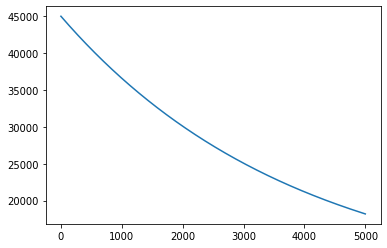

In [331]:
plt.plot(loss_history[5000:])

График изменения метрики начиная с 5000 эпохи

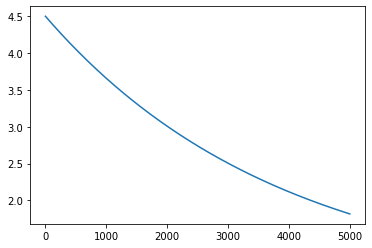

In [341]:
plt.plot(metric_history[5000:])

In [344]:
X_without_feature.shape

(10000, 3)

Удалим ещё 4ый признак и попробуем обучить без него, так как он тоже сильно скоррелирован со 2м

In [350]:
X_without_2feature = np.delete(X_without_feature, 2, axis=1)

In [351]:
X_without_2feature

array([[-1.6392424 ,  1.90401167],
       [-5.49543837, 29.28539091],
       [-4.59480326, 18.48815797],
       ...,
       [ 3.7384779 , 13.26627503],
       [ 3.90722646, 13.38085898],
       [ 6.61282838, 43.71935532]])

Обучим на этих признаках, для этого также добавим одно измерение, чтобы получить баес

In [354]:
bias = np.ones((X_without_2feature.shape[0], 1))
X = np.hstack((X_without_2feature, bias))

In [355]:
obj_fn = loss()
lr_model = linear_regression()
loss_history, metric_history = train_loop(X, ytr, lr_model, obj_fn, epochs=10000)










  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]








  0%|                                                                  | 1/10000 [00:00<07:24, 22.47it/s, loss=5.71e+6]








  0%|                                                                  | 2/10000 [00:00<04:27, 37.40it/s, loss=5.54e+6]








  0%|                                                                  | 3/10000 [00:00<03:28, 47.94it/s, loss=5.38e+6]








  0%|                                                                  | 4/10000 [00:00<02:58, 56.00it/s, loss=5.23e+6]








  0%|                                                                  | 5/10000 [00:00<02:38, 62.97it/s, loss=5.08e+6]








  0%|                                                                  | 6/10000 [00:00<02:25, 68.66it/s, loss=4.94e+6]








  0%|                                                                  | 7/10000 [00:00<02:17, 

  1%|▍                                                                | 60/10000 [00:00<01:26, 114.99it/s, loss=2.4e+6]








  1%|▍                                                               | 61/10000 [00:00<01:26, 114.99it/s, loss=2.39e+6]








  1%|▍                                                               | 62/10000 [00:00<01:26, 114.99it/s, loss=2.38e+6]








  1%|▍                                                               | 63/10000 [00:00<01:26, 114.99it/s, loss=2.37e+6]








  1%|▍                                                               | 64/10000 [00:00<01:26, 114.99it/s, loss=2.36e+6]








  1%|▍                                                               | 65/10000 [00:00<01:26, 114.99it/s, loss=2.35e+6]








  1%|▍                                                               | 66/10000 [00:00<01:26, 114.99it/s, loss=2.34e+6]








  1%|▍                                                               | 67/10000 [00:00<01:26, 114.99it/s

  2%|█▏                                                             | 181/10000 [00:01<01:03, 154.91it/s, loss=2.08e+6]








  2%|█▏                                                             | 182/10000 [00:01<01:03, 154.91it/s, loss=2.08e+6]








  2%|█▏                                                             | 183/10000 [00:01<01:03, 154.91it/s, loss=2.07e+6]








  2%|█▏                                                             | 184/10000 [00:01<01:03, 154.91it/s, loss=2.07e+6]








  2%|█▏                                                             | 185/10000 [00:01<01:03, 154.50it/s, loss=2.07e+6]








  2%|█▏                                                             | 185/10000 [00:01<01:03, 154.50it/s, loss=2.07e+6]








  2%|█▏                                                             | 186/10000 [00:01<01:03, 154.50it/s, loss=2.07e+6]








  2%|█▏                                                             | 187/10000 [00:01<01:03, 154.50it/s

  3%|█▉                                                             | 301/10000 [00:02<01:12, 133.58it/s, loss=1.94e+6]








  3%|█▉                                                             | 302/10000 [00:02<01:12, 133.58it/s, loss=1.94e+6]








  3%|█▉                                                             | 303/10000 [00:02<01:12, 133.58it/s, loss=1.94e+6]








  3%|█▉                                                             | 304/10000 [00:02<01:12, 133.58it/s, loss=1.94e+6]








  3%|█▉                                                             | 305/10000 [00:02<01:12, 133.58it/s, loss=1.94e+6]








  3%|█▉                                                             | 306/10000 [00:02<01:12, 133.58it/s, loss=1.94e+6]








  3%|█▉                                                             | 307/10000 [00:02<01:12, 133.58it/s, loss=1.94e+6]








  3%|█▉                                                             | 308/10000 [00:02<01:12, 133.58it/s

  4%|██▋                                                            | 422/10000 [00:02<01:04, 149.45it/s, loss=1.83e+6]








  4%|██▋                                                            | 423/10000 [00:02<01:03, 150.08it/s, loss=1.83e+6]








  4%|██▋                                                            | 423/10000 [00:02<01:03, 150.08it/s, loss=1.83e+6]








  4%|██▋                                                            | 424/10000 [00:02<01:03, 150.08it/s, loss=1.83e+6]








  4%|██▋                                                            | 425/10000 [00:02<01:03, 150.08it/s, loss=1.82e+6]








  4%|██▋                                                            | 426/10000 [00:02<01:03, 150.08it/s, loss=1.82e+6]








  4%|██▋                                                            | 427/10000 [00:02<01:03, 150.08it/s, loss=1.82e+6]








  4%|██▋                                                            | 428/10000 [00:02<01:03, 150.08it/s

  5%|███▍                                                           | 542/10000 [00:03<01:00, 157.23it/s, loss=1.73e+6]








  5%|███▍                                                           | 543/10000 [00:03<01:00, 157.23it/s, loss=1.73e+6]








  5%|███▍                                                           | 544/10000 [00:03<01:00, 157.23it/s, loss=1.72e+6]








  5%|███▍                                                           | 545/10000 [00:03<01:00, 157.23it/s, loss=1.72e+6]








  5%|███▍                                                           | 546/10000 [00:03<01:00, 157.23it/s, loss=1.72e+6]








  5%|███▍                                                           | 547/10000 [00:03<01:00, 157.23it/s, loss=1.72e+6]








  5%|███▍                                                           | 548/10000 [00:03<01:00, 157.23it/s, loss=1.72e+6]








  5%|███▍                                                           | 549/10000 [00:03<01:00, 157.23it/s

  7%|████▏                                                          | 663/10000 [00:04<00:57, 162.68it/s, loss=1.64e+6]








  7%|████▏                                                          | 664/10000 [00:04<00:57, 162.68it/s, loss=1.64e+6]








  7%|████▏                                                          | 665/10000 [00:04<00:57, 162.68it/s, loss=1.64e+6]








  7%|████▏                                                          | 666/10000 [00:04<00:57, 162.68it/s, loss=1.64e+6]








  7%|████▏                                                          | 667/10000 [00:04<00:57, 162.68it/s, loss=1.64e+6]








  7%|████▏                                                          | 668/10000 [00:04<00:57, 162.68it/s, loss=1.64e+6]








  7%|████▏                                                          | 669/10000 [00:04<00:57, 162.68it/s, loss=1.63e+6]








  7%|████▏                                                          | 670/10000 [00:04<00:57, 162.68it/s

  8%|████▉                                                          | 784/10000 [00:05<01:01, 149.50it/s, loss=1.56e+6]








  8%|████▉                                                          | 785/10000 [00:05<01:01, 149.50it/s, loss=1.56e+6]








  8%|████▉                                                          | 786/10000 [00:05<01:01, 149.50it/s, loss=1.56e+6]








  8%|████▉                                                          | 787/10000 [00:05<01:01, 149.50it/s, loss=1.56e+6]








  8%|████▉                                                          | 788/10000 [00:05<01:01, 149.50it/s, loss=1.56e+6]








  8%|████▉                                                          | 789/10000 [00:05<01:01, 149.50it/s, loss=1.56e+6]








  8%|████▉                                                          | 790/10000 [00:05<01:01, 149.50it/s, loss=1.56e+6]








  8%|████▉                                                          | 791/10000 [00:05<01:01, 149.20it/s

  9%|█████▊                                                          | 905/10000 [00:05<00:55, 163.64it/s, loss=1.5e+6]








  9%|█████▋                                                         | 906/10000 [00:05<00:55, 163.64it/s, loss=1.49e+6]








  9%|█████▋                                                         | 907/10000 [00:05<00:55, 163.64it/s, loss=1.49e+6]








  9%|█████▋                                                         | 908/10000 [00:05<00:55, 163.64it/s, loss=1.49e+6]








  9%|█████▋                                                         | 909/10000 [00:05<00:55, 163.64it/s, loss=1.49e+6]








  9%|█████▋                                                         | 910/10000 [00:05<00:55, 163.64it/s, loss=1.49e+6]








  9%|█████▋                                                         | 911/10000 [00:05<00:54, 165.79it/s, loss=1.49e+6]








  9%|█████▋                                                         | 911/10000 [00:05<00:54, 165.79it/s

 10%|██████▎                                                       | 1026/10000 [00:06<00:54, 163.65it/s, loss=1.44e+6]








 10%|██████▎                                                       | 1027/10000 [00:06<00:54, 163.65it/s, loss=1.44e+6]








 10%|██████▎                                                       | 1028/10000 [00:06<00:54, 163.65it/s, loss=1.44e+6]








 10%|██████▍                                                       | 1029/10000 [00:06<00:54, 163.65it/s, loss=1.44e+6]








 10%|██████▍                                                       | 1030/10000 [00:06<00:54, 163.46it/s, loss=1.44e+6]








 10%|██████▍                                                       | 1030/10000 [00:06<00:54, 163.46it/s, loss=1.44e+6]








 10%|██████▍                                                       | 1031/10000 [00:06<00:54, 163.46it/s, loss=1.44e+6]








 10%|██████▍                                                       | 1032/10000 [00:06<00:54, 163.46it/s

 11%|███████                                                       | 1147/10000 [00:07<00:55, 159.83it/s, loss=1.39e+6]








 11%|███████                                                       | 1148/10000 [00:07<00:55, 159.83it/s, loss=1.39e+6]








 11%|███████                                                       | 1149/10000 [00:07<00:54, 162.02it/s, loss=1.39e+6]








 11%|███████                                                       | 1149/10000 [00:07<00:54, 162.02it/s, loss=1.39e+6]








 12%|███████▏                                                      | 1150/10000 [00:07<00:54, 162.02it/s, loss=1.39e+6]








 12%|███████▏                                                      | 1151/10000 [00:07<00:54, 162.02it/s, loss=1.39e+6]








 12%|███████▏                                                      | 1152/10000 [00:07<00:54, 162.02it/s, loss=1.39e+6]








 12%|███████▏                                                      | 1153/10000 [00:07<00:54, 162.02it/s

 13%|███████▊                                                      | 1267/10000 [00:08<00:54, 159.49it/s, loss=1.34e+6]








 13%|███████▊                                                      | 1268/10000 [00:08<00:54, 159.49it/s, loss=1.34e+6]








 13%|███████▊                                                      | 1269/10000 [00:08<00:54, 159.49it/s, loss=1.34e+6]








 13%|███████▊                                                      | 1270/10000 [00:08<00:54, 159.49it/s, loss=1.34e+6]








 13%|███████▉                                                      | 1271/10000 [00:08<00:54, 159.49it/s, loss=1.34e+6]








 13%|███████▉                                                      | 1272/10000 [00:08<00:54, 159.49it/s, loss=1.34e+6]








 13%|███████▉                                                      | 1273/10000 [00:08<00:54, 159.49it/s, loss=1.34e+6]








 13%|███████▉                                                      | 1274/10000 [00:08<00:54, 159.49it/s

 14%|████████▌                                                     | 1388/10000 [00:08<00:54, 159.35it/s, loss=1.31e+6]








 14%|████████▌                                                     | 1389/10000 [00:08<00:54, 159.35it/s, loss=1.31e+6]








 14%|████████▊                                                      | 1390/10000 [00:08<00:54, 159.35it/s, loss=1.3e+6]








 14%|████████▊                                                      | 1391/10000 [00:08<00:54, 159.35it/s, loss=1.3e+6]








 14%|████████▊                                                      | 1392/10000 [00:08<00:54, 159.35it/s, loss=1.3e+6]








 14%|████████▊                                                      | 1393/10000 [00:08<00:54, 159.35it/s, loss=1.3e+6]








 14%|████████▊                                                      | 1394/10000 [00:08<00:54, 159.35it/s, loss=1.3e+6]








 14%|████████▊                                                      | 1395/10000 [00:08<00:54, 159.35it/

 15%|█████████▎                                                    | 1509/10000 [00:09<00:52, 162.08it/s, loss=1.27e+6]








 15%|█████████▎                                                    | 1510/10000 [00:09<00:52, 162.08it/s, loss=1.27e+6]








 15%|█████████▎                                                    | 1511/10000 [00:09<00:52, 162.08it/s, loss=1.27e+6]








 15%|█████████▎                                                    | 1512/10000 [00:09<00:52, 162.08it/s, loss=1.27e+6]








 15%|█████████▍                                                    | 1513/10000 [00:09<00:52, 162.08it/s, loss=1.27e+6]








 15%|█████████▍                                                    | 1514/10000 [00:09<00:52, 162.08it/s, loss=1.27e+6]








 15%|█████████▍                                                    | 1515/10000 [00:09<00:52, 162.08it/s, loss=1.27e+6]








 15%|█████████▍                                                    | 1516/10000 [00:09<00:52, 162.08it/s

 16%|██████████                                                    | 1630/10000 [00:10<00:54, 153.08it/s, loss=1.24e+6]








 16%|██████████                                                    | 1631/10000 [00:10<00:54, 153.08it/s, loss=1.24e+6]








 16%|██████████                                                    | 1632/10000 [00:10<00:54, 153.08it/s, loss=1.24e+6]








 16%|██████████                                                    | 1633/10000 [00:10<00:54, 153.08it/s, loss=1.24e+6]








 16%|██████████▏                                                   | 1634/10000 [00:10<01:01, 135.09it/s, loss=1.24e+6]








 16%|██████████▏                                                   | 1634/10000 [00:10<01:01, 135.09it/s, loss=1.24e+6]








 16%|██████████▏                                                   | 1635/10000 [00:10<01:01, 135.09it/s, loss=1.24e+6]








 16%|██████████▏                                                   | 1636/10000 [00:10<01:01, 135.09it/s

 18%|██████████▊                                                   | 1751/10000 [00:11<00:51, 159.94it/s, loss=1.22e+6]








 18%|██████████▊                                                   | 1752/10000 [00:11<00:51, 160.43it/s, loss=1.22e+6]








 18%|██████████▊                                                   | 1752/10000 [00:11<00:51, 160.43it/s, loss=1.22e+6]








 18%|██████████▊                                                   | 1753/10000 [00:11<00:51, 160.43it/s, loss=1.22e+6]








 18%|██████████▊                                                   | 1754/10000 [00:11<00:51, 160.43it/s, loss=1.22e+6]








 18%|██████████▉                                                   | 1755/10000 [00:11<00:51, 160.43it/s, loss=1.22e+6]








 18%|██████████▉                                                   | 1756/10000 [00:11<00:51, 160.43it/s, loss=1.22e+6]








 18%|██████████▉                                                   | 1757/10000 [00:11<00:51, 160.43it/s

 19%|███████████▊                                                   | 1871/10000 [00:12<00:49, 164.49it/s, loss=1.2e+6]








 19%|███████████▊                                                   | 1872/10000 [00:12<00:49, 164.49it/s, loss=1.2e+6]








 19%|███████████▊                                                   | 1873/10000 [00:12<00:49, 164.49it/s, loss=1.2e+6]








 19%|███████████▊                                                   | 1874/10000 [00:12<00:49, 164.49it/s, loss=1.2e+6]








 19%|███████████▊                                                   | 1875/10000 [00:12<00:49, 164.49it/s, loss=1.2e+6]








 19%|███████████▊                                                   | 1876/10000 [00:12<00:49, 164.49it/s, loss=1.2e+6]








 19%|███████████▊                                                   | 1877/10000 [00:12<00:49, 164.49it/s, loss=1.2e+6]








 19%|███████████▊                                                   | 1878/10000 [00:12<00:49, 164.49it/

 20%|████████████▎                                                 | 1992/10000 [00:12<00:49, 162.49it/s, loss=1.18e+6]








 20%|████████████▎                                                 | 1993/10000 [00:12<00:49, 162.49it/s, loss=1.18e+6]








 20%|████████████▎                                                 | 1994/10000 [00:12<00:49, 162.49it/s, loss=1.18e+6]








 20%|████████████▎                                                 | 1995/10000 [00:12<00:49, 162.49it/s, loss=1.18e+6]








 20%|████████████▍                                                 | 1996/10000 [00:12<00:49, 162.49it/s, loss=1.18e+6]








 20%|████████████▍                                                 | 1997/10000 [00:12<00:49, 162.49it/s, loss=1.18e+6]








 20%|████████████▍                                                 | 1998/10000 [00:12<00:49, 162.49it/s, loss=1.18e+6]








 20%|████████████▍                                                 | 1999/10000 [00:12<00:49, 162.49it/s

 21%|█████████████                                                 | 2113/10000 [00:13<00:48, 161.53it/s, loss=1.16e+6]








 21%|█████████████                                                 | 2114/10000 [00:13<00:48, 161.53it/s, loss=1.16e+6]








 21%|█████████████                                                 | 2115/10000 [00:13<00:48, 161.53it/s, loss=1.16e+6]








 21%|█████████████                                                 | 2116/10000 [00:13<00:48, 161.53it/s, loss=1.16e+6]








 21%|█████████████▏                                                | 2117/10000 [00:13<00:48, 161.53it/s, loss=1.16e+6]








 21%|█████████████▏                                                | 2118/10000 [00:13<00:48, 161.53it/s, loss=1.16e+6]








 21%|█████████████▏                                                | 2119/10000 [00:13<00:48, 161.53it/s, loss=1.16e+6]








 21%|█████████████▏                                                | 2120/10000 [00:13<00:48, 161.53it/s

 22%|█████████████▊                                                | 2234/10000 [00:14<00:47, 163.05it/s, loss=1.15e+6]








 22%|█████████████▊                                                | 2235/10000 [00:14<00:47, 163.05it/s, loss=1.15e+6]








 22%|█████████████▊                                                | 2236/10000 [00:14<00:47, 163.05it/s, loss=1.15e+6]








 22%|█████████████▊                                                | 2237/10000 [00:14<00:47, 163.05it/s, loss=1.15e+6]








 22%|█████████████▉                                                | 2238/10000 [00:14<00:47, 163.05it/s, loss=1.15e+6]








 22%|█████████████▉                                                | 2239/10000 [00:14<00:47, 163.05it/s, loss=1.15e+6]








 22%|█████████████▉                                                | 2240/10000 [00:14<00:47, 163.05it/s, loss=1.15e+6]








 22%|█████████████▉                                                | 2241/10000 [00:14<00:47, 163.05it/s

 24%|██████████████▌                                               | 2355/10000 [00:14<00:46, 165.19it/s, loss=1.13e+6]








 24%|██████████████▌                                               | 2356/10000 [00:14<00:46, 165.19it/s, loss=1.13e+6]








 24%|██████████████▌                                               | 2357/10000 [00:14<00:46, 165.19it/s, loss=1.13e+6]








 24%|██████████████▌                                               | 2358/10000 [00:14<00:46, 165.19it/s, loss=1.13e+6]








 24%|██████████████▋                                               | 2359/10000 [00:14<00:46, 165.19it/s, loss=1.13e+6]








 24%|██████████████▋                                               | 2360/10000 [00:15<00:46, 165.19it/s, loss=1.13e+6]








 24%|██████████████▋                                               | 2361/10000 [00:15<00:46, 165.19it/s, loss=1.13e+6]








 24%|██████████████▋                                               | 2362/10000 [00:15<00:46, 165.19it/s

 25%|███████████████▎                                              | 2476/10000 [00:15<00:46, 162.07it/s, loss=1.12e+6]








 25%|███████████████▎                                              | 2477/10000 [00:15<00:46, 162.07it/s, loss=1.12e+6]








 25%|███████████████▎                                              | 2478/10000 [00:15<00:46, 162.07it/s, loss=1.12e+6]








 25%|███████████████▎                                              | 2479/10000 [00:15<00:46, 162.07it/s, loss=1.12e+6]








 25%|███████████████▍                                              | 2480/10000 [00:15<00:46, 162.07it/s, loss=1.12e+6]








 25%|███████████████▍                                              | 2481/10000 [00:15<00:46, 162.07it/s, loss=1.12e+6]








 25%|███████████████▍                                              | 2482/10000 [00:15<00:46, 162.07it/s, loss=1.12e+6]








 25%|███████████████▍                                              | 2483/10000 [00:15<00:46, 162.34it/s

 26%|████████████████                                              | 2597/10000 [00:16<00:44, 165.89it/s, loss=1.11e+6]








 26%|████████████████                                              | 2598/10000 [00:16<00:44, 165.89it/s, loss=1.11e+6]








 26%|████████████████                                              | 2599/10000 [00:16<00:44, 165.89it/s, loss=1.11e+6]








 26%|████████████████                                              | 2600/10000 [00:16<00:44, 165.89it/s, loss=1.11e+6]








 26%|████████████████▏                                             | 2601/10000 [00:16<00:44, 165.89it/s, loss=1.11e+6]








 26%|████████████████▏                                             | 2602/10000 [00:16<00:44, 166.15it/s, loss=1.11e+6]








 26%|████████████████▏                                             | 2602/10000 [00:16<00:44, 166.15it/s, loss=1.11e+6]








 26%|████████████████▏                                             | 2603/10000 [00:16<00:44, 166.15it/s

 27%|████████████████▊                                             | 2718/10000 [00:17<00:44, 164.23it/s, loss=1.11e+6]








 27%|████████████████▊                                             | 2719/10000 [00:17<00:44, 164.23it/s, loss=1.11e+6]








 27%|████████████████▊                                             | 2720/10000 [00:17<00:44, 164.23it/s, loss=1.11e+6]








 27%|████████████████▊                                             | 2721/10000 [00:17<00:44, 162.99it/s, loss=1.11e+6]








 27%|████████████████▊                                             | 2721/10000 [00:17<00:44, 162.99it/s, loss=1.11e+6]








 27%|████████████████▉                                             | 2722/10000 [00:17<00:44, 162.99it/s, loss=1.11e+6]








 27%|████████████████▉                                             | 2723/10000 [00:17<00:44, 162.99it/s, loss=1.11e+6]








 27%|████████████████▉                                             | 2724/10000 [00:17<00:44, 162.99it/s

 28%|█████████████████▉                                             | 2839/10000 [00:17<00:43, 162.75it/s, loss=1.1e+6]








 28%|█████████████████▉                                             | 2840/10000 [00:17<00:43, 163.67it/s, loss=1.1e+6]








 28%|█████████████████▉                                             | 2840/10000 [00:17<00:43, 163.67it/s, loss=1.1e+6]








 28%|█████████████████▉                                             | 2841/10000 [00:17<00:43, 163.67it/s, loss=1.1e+6]








 28%|█████████████████▉                                             | 2842/10000 [00:17<00:43, 163.67it/s, loss=1.1e+6]








 28%|█████████████████▉                                             | 2843/10000 [00:17<00:43, 163.67it/s, loss=1.1e+6]








 28%|█████████████████▉                                             | 2844/10000 [00:17<00:43, 163.67it/s, loss=1.1e+6]








 28%|█████████████████▉                                             | 2845/10000 [00:17<00:43, 163.67it/

 30%|██████████████████▎                                           | 2960/10000 [00:18<00:42, 165.49it/s, loss=1.09e+6]








 30%|██████████████████▎                                           | 2960/10000 [00:18<00:42, 165.49it/s, loss=1.09e+6]








 30%|██████████████████▎                                           | 2961/10000 [00:18<00:42, 165.49it/s, loss=1.09e+6]








 30%|██████████████████▎                                           | 2962/10000 [00:18<00:42, 165.49it/s, loss=1.09e+6]








 30%|██████████████████▎                                           | 2963/10000 [00:18<00:42, 165.49it/s, loss=1.09e+6]








 30%|██████████████████▍                                           | 2964/10000 [00:18<00:42, 165.49it/s, loss=1.09e+6]








 30%|██████████████████▍                                           | 2965/10000 [00:18<00:42, 165.49it/s, loss=1.09e+6]








 30%|██████████████████▍                                           | 2966/10000 [00:18<00:42, 165.49it/s

 31%|███████████████████                                           | 3080/10000 [00:19<00:42, 164.47it/s, loss=1.09e+6]








 31%|███████████████████                                           | 3081/10000 [00:19<00:42, 164.47it/s, loss=1.09e+6]








 31%|███████████████████                                           | 3082/10000 [00:19<00:42, 164.47it/s, loss=1.09e+6]








 31%|███████████████████                                           | 3083/10000 [00:19<00:42, 164.47it/s, loss=1.09e+6]








 31%|███████████████████                                           | 3084/10000 [00:19<00:42, 164.47it/s, loss=1.09e+6]








 31%|███████████████████▏                                          | 3085/10000 [00:19<00:42, 164.47it/s, loss=1.09e+6]








 31%|███████████████████▏                                          | 3086/10000 [00:19<00:42, 164.47it/s, loss=1.09e+6]








 31%|███████████████████▏                                          | 3087/10000 [00:19<00:42, 164.47it/s

 32%|███████████████████▊                                          | 3201/10000 [00:20<00:41, 162.52it/s, loss=1.08e+6]








 32%|███████████████████▊                                          | 3202/10000 [00:20<00:41, 162.52it/s, loss=1.08e+6]








 32%|███████████████████▊                                          | 3203/10000 [00:20<00:41, 162.52it/s, loss=1.08e+6]








 32%|███████████████████▊                                          | 3204/10000 [00:20<00:41, 162.52it/s, loss=1.08e+6]








 32%|███████████████████▊                                          | 3205/10000 [00:20<00:41, 162.52it/s, loss=1.08e+6]








 32%|███████████████████▉                                          | 3206/10000 [00:20<00:41, 162.52it/s, loss=1.08e+6]








 32%|███████████████████▉                                          | 3207/10000 [00:20<00:41, 162.52it/s, loss=1.08e+6]








 32%|███████████████████▉                                          | 3208/10000 [00:20<00:41, 162.52it/s

 33%|████████████████████▌                                         | 3322/10000 [00:20<00:41, 162.25it/s, loss=1.08e+6]








 33%|████████████████████▌                                         | 3323/10000 [00:20<00:41, 162.25it/s, loss=1.08e+6]








 33%|████████████████████▌                                         | 3324/10000 [00:20<00:41, 162.25it/s, loss=1.08e+6]








 33%|████████████████████▌                                         | 3325/10000 [00:20<00:41, 162.25it/s, loss=1.08e+6]








 33%|████████████████████▌                                         | 3326/10000 [00:20<00:41, 162.25it/s, loss=1.08e+6]








 33%|████████████████████▋                                         | 3327/10000 [00:20<00:41, 162.25it/s, loss=1.08e+6]








 33%|████████████████████▋                                         | 3328/10000 [00:20<00:41, 162.25it/s, loss=1.08e+6]








 33%|████████████████████▋                                         | 3329/10000 [00:20<00:41, 162.25it/s

 34%|█████████████████████▎                                        | 3443/10000 [00:21<00:40, 162.63it/s, loss=1.08e+6]








 34%|█████████████████████▎                                        | 3444/10000 [00:21<00:40, 162.63it/s, loss=1.08e+6]








 34%|█████████████████████▎                                        | 3445/10000 [00:21<00:40, 162.63it/s, loss=1.08e+6]








 34%|█████████████████████▎                                        | 3446/10000 [00:21<00:40, 162.63it/s, loss=1.08e+6]








 34%|█████████████████████▎                                        | 3447/10000 [00:21<00:40, 162.63it/s, loss=1.08e+6]








 34%|█████████████████████▍                                        | 3448/10000 [00:21<00:40, 162.63it/s, loss=1.08e+6]








 34%|█████████████████████▍                                        | 3449/10000 [00:21<00:40, 162.63it/s, loss=1.08e+6]








 34%|█████████████████████▍                                        | 3450/10000 [00:21<00:40, 162.63it/s

 36%|██████████████████████                                        | 3564/10000 [00:22<00:40, 157.09it/s, loss=1.07e+6]








 36%|██████████████████████                                        | 3565/10000 [00:22<00:40, 157.09it/s, loss=1.07e+6]








 36%|██████████████████████                                        | 3566/10000 [00:22<00:40, 157.09it/s, loss=1.07e+6]








 36%|██████████████████████                                        | 3567/10000 [00:22<00:40, 157.09it/s, loss=1.07e+6]








 36%|██████████████████████                                        | 3568/10000 [00:22<00:40, 157.09it/s, loss=1.07e+6]








 36%|██████████████████████▏                                       | 3569/10000 [00:22<00:40, 157.09it/s, loss=1.07e+6]








 36%|██████████████████████▏                                       | 3570/10000 [00:22<00:40, 159.43it/s, loss=1.07e+6]








 36%|██████████████████████▏                                       | 3570/10000 [00:22<00:40, 159.43it/s

 37%|██████████████████████▊                                       | 3685/10000 [00:23<00:38, 162.29it/s, loss=1.07e+6]








 37%|██████████████████████▊                                       | 3686/10000 [00:23<00:38, 162.29it/s, loss=1.07e+6]








 37%|██████████████████████▊                                       | 3687/10000 [00:23<00:38, 162.29it/s, loss=1.07e+6]








 37%|██████████████████████▊                                       | 3688/10000 [00:23<00:38, 162.29it/s, loss=1.07e+6]








 37%|██████████████████████▊                                       | 3689/10000 [00:23<00:38, 163.23it/s, loss=1.07e+6]








 37%|██████████████████████▊                                       | 3689/10000 [00:23<00:38, 163.23it/s, loss=1.07e+6]








 37%|██████████████████████▉                                       | 3690/10000 [00:23<00:38, 163.23it/s, loss=1.07e+6]








 37%|██████████████████████▉                                       | 3691/10000 [00:23<00:38, 163.23it/s

 38%|███████████████████████▌                                      | 3806/10000 [00:23<00:39, 156.94it/s, loss=1.07e+6]








 38%|███████████████████████▌                                      | 3807/10000 [00:23<00:39, 156.94it/s, loss=1.07e+6]








 38%|███████████████████████▌                                      | 3808/10000 [00:23<00:39, 158.45it/s, loss=1.07e+6]








 38%|███████████████████████▌                                      | 3808/10000 [00:23<00:39, 158.45it/s, loss=1.07e+6]








 38%|███████████████████████▌                                      | 3809/10000 [00:23<00:39, 158.45it/s, loss=1.07e+6]








 38%|███████████████████████▌                                      | 3810/10000 [00:23<00:39, 158.45it/s, loss=1.07e+6]








 38%|███████████████████████▋                                      | 3811/10000 [00:23<00:39, 158.45it/s, loss=1.07e+6]








 38%|███████████████████████▋                                      | 3812/10000 [00:23<00:39, 158.45it/s

 39%|████████████████████████▎                                     | 3927/10000 [00:24<00:37, 163.86it/s, loss=1.07e+6]








 39%|████████████████████████▎                                     | 3927/10000 [00:24<00:37, 163.86it/s, loss=1.07e+6]








 39%|████████████████████████▎                                     | 3928/10000 [00:24<00:37, 163.86it/s, loss=1.07e+6]








 39%|████████████████████████▎                                     | 3929/10000 [00:24<00:37, 163.86it/s, loss=1.07e+6]








 39%|████████████████████████▎                                     | 3930/10000 [00:24<00:37, 163.86it/s, loss=1.07e+6]








 39%|████████████████████████▎                                     | 3931/10000 [00:24<00:37, 163.86it/s, loss=1.07e+6]








 39%|████████████████████████▍                                     | 3932/10000 [00:24<00:37, 163.86it/s, loss=1.07e+6]








 39%|████████████████████████▍                                     | 3933/10000 [00:24<00:37, 163.86it/s

 40%|█████████████████████████                                     | 4047/10000 [00:25<00:37, 159.08it/s, loss=1.06e+6]








 40%|█████████████████████████                                     | 4048/10000 [00:25<00:37, 159.08it/s, loss=1.06e+6]








 40%|█████████████████████████                                     | 4049/10000 [00:25<00:37, 159.08it/s, loss=1.06e+6]








 40%|█████████████████████████                                     | 4050/10000 [00:25<00:37, 159.08it/s, loss=1.06e+6]








 41%|█████████████████████████                                     | 4051/10000 [00:25<00:37, 159.08it/s, loss=1.06e+6]








 41%|█████████████████████████                                     | 4052/10000 [00:25<00:37, 159.08it/s, loss=1.06e+6]








 41%|█████████████████████████▏                                    | 4053/10000 [00:25<00:37, 159.08it/s, loss=1.06e+6]








 41%|█████████████████████████▏                                    | 4054/10000 [00:25<00:37, 159.08it/s

 42%|█████████████████████████▊                                    | 4168/10000 [00:26<00:35, 164.13it/s, loss=1.06e+6]








 42%|█████████████████████████▊                                    | 4169/10000 [00:26<00:35, 164.13it/s, loss=1.06e+6]








 42%|█████████████████████████▊                                    | 4170/10000 [00:26<00:35, 164.13it/s, loss=1.06e+6]








 42%|█████████████████████████▊                                    | 4171/10000 [00:26<00:35, 164.13it/s, loss=1.06e+6]








 42%|█████████████████████████▊                                    | 4172/10000 [00:26<00:35, 164.13it/s, loss=1.06e+6]








 42%|█████████████████████████▊                                    | 4173/10000 [00:26<00:35, 164.13it/s, loss=1.06e+6]








 42%|█████████████████████████▉                                    | 4174/10000 [00:26<00:35, 164.13it/s, loss=1.06e+6]








 42%|█████████████████████████▉                                    | 4175/10000 [00:26<00:35, 164.13it/s

 43%|██████████████████████████▌                                   | 4289/10000 [00:26<00:34, 163.75it/s, loss=1.06e+6]








 43%|██████████████████████████▌                                   | 4290/10000 [00:26<00:34, 163.75it/s, loss=1.06e+6]








 43%|██████████████████████████▌                                   | 4291/10000 [00:26<00:34, 163.75it/s, loss=1.06e+6]








 43%|██████████████████████████▌                                   | 4292/10000 [00:26<00:34, 163.75it/s, loss=1.06e+6]








 43%|██████████████████████████▌                                   | 4293/10000 [00:26<00:34, 163.75it/s, loss=1.06e+6]








 43%|██████████████████████████▌                                   | 4294/10000 [00:26<00:34, 163.75it/s, loss=1.06e+6]








 43%|██████████████████████████▋                                   | 4295/10000 [00:26<00:34, 163.75it/s, loss=1.06e+6]








 43%|██████████████████████████▋                                   | 4296/10000 [00:26<00:34, 163.75it/s

 44%|███████████████████████████▎                                  | 4410/10000 [00:27<00:34, 162.43it/s, loss=1.06e+6]








 44%|███████████████████████████▎                                  | 4411/10000 [00:27<00:34, 162.43it/s, loss=1.06e+6]








 44%|███████████████████████████▎                                  | 4412/10000 [00:27<00:34, 162.43it/s, loss=1.06e+6]








 44%|███████████████████████████▎                                  | 4413/10000 [00:27<00:34, 162.43it/s, loss=1.06e+6]








 44%|███████████████████████████▎                                  | 4414/10000 [00:27<00:34, 162.43it/s, loss=1.06e+6]








 44%|███████████████████████████▎                                  | 4415/10000 [00:27<00:34, 162.43it/s, loss=1.06e+6]








 44%|███████████████████████████▍                                  | 4416/10000 [00:27<00:34, 162.43it/s, loss=1.06e+6]








 44%|███████████████████████████▍                                  | 4417/10000 [00:27<00:34, 162.43it/s

 45%|████████████████████████████                                  | 4531/10000 [00:28<00:36, 151.48it/s, loss=1.06e+6]








 45%|████████████████████████████                                  | 4532/10000 [00:28<00:36, 151.48it/s, loss=1.06e+6]








 45%|████████████████████████████                                  | 4533/10000 [00:28<00:36, 151.20it/s, loss=1.06e+6]








 45%|████████████████████████████                                  | 4533/10000 [00:28<00:36, 151.20it/s, loss=1.06e+6]








 45%|████████████████████████████                                  | 4534/10000 [00:28<00:36, 151.20it/s, loss=1.06e+6]








 45%|████████████████████████████                                  | 4535/10000 [00:28<00:36, 151.20it/s, loss=1.06e+6]








 45%|████████████████████████████                                  | 4536/10000 [00:28<00:36, 151.20it/s, loss=1.06e+6]








 45%|████████████████████████████▏                                 | 4537/10000 [00:28<00:36, 151.20it/s

 47%|████████████████████████████▊                                 | 4651/10000 [00:29<00:35, 150.88it/s, loss=1.06e+6]








 47%|████████████████████████████▊                                 | 4652/10000 [00:29<00:35, 150.88it/s, loss=1.06e+6]








 47%|████████████████████████████▊                                 | 4653/10000 [00:29<00:35, 150.88it/s, loss=1.06e+6]








 47%|████████████████████████████▊                                 | 4654/10000 [00:29<00:35, 150.88it/s, loss=1.06e+6]








 47%|████████████████████████████▊                                 | 4655/10000 [00:29<00:35, 150.88it/s, loss=1.06e+6]








 47%|████████████████████████████▊                                 | 4656/10000 [00:29<00:35, 150.88it/s, loss=1.06e+6]








 47%|████████████████████████████▊                                 | 4657/10000 [00:29<00:35, 150.88it/s, loss=1.06e+6]








 47%|████████████████████████████▉                                 | 4658/10000 [00:29<00:35, 150.88it/s

 48%|█████████████████████████████▌                                | 4772/10000 [00:29<00:32, 159.94it/s, loss=1.06e+6]








 48%|█████████████████████████████▌                                | 4773/10000 [00:29<00:32, 159.94it/s, loss=1.06e+6]








 48%|█████████████████████████████▌                                | 4774/10000 [00:29<00:32, 159.94it/s, loss=1.06e+6]








 48%|█████████████████████████████▌                                | 4775/10000 [00:29<00:32, 159.94it/s, loss=1.06e+6]








 48%|█████████████████████████████▌                                | 4776/10000 [00:29<00:32, 159.94it/s, loss=1.06e+6]








 48%|█████████████████████████████▌                                | 4777/10000 [00:29<00:32, 159.94it/s, loss=1.06e+6]








 48%|█████████████████████████████▌                                | 4778/10000 [00:30<00:32, 159.94it/s, loss=1.06e+6]








 48%|█████████████████████████████▋                                | 4779/10000 [00:30<00:32, 159.94it/s

 49%|██████████████████████████████▎                               | 4893/10000 [00:30<00:34, 149.85it/s, loss=1.06e+6]








 49%|██████████████████████████████▎                               | 4894/10000 [00:30<00:34, 149.85it/s, loss=1.06e+6]








 49%|██████████████████████████████▎                               | 4895/10000 [00:30<00:34, 149.85it/s, loss=1.06e+6]








 49%|██████████████████████████████▎                               | 4896/10000 [00:30<00:34, 149.85it/s, loss=1.06e+6]








 49%|██████████████████████████████▎                               | 4897/10000 [00:30<00:34, 149.69it/s, loss=1.06e+6]








 49%|██████████████████████████████▎                               | 4897/10000 [00:30<00:34, 149.69it/s, loss=1.06e+6]








 49%|██████████████████████████████▎                               | 4898/10000 [00:30<00:34, 149.69it/s, loss=1.06e+6]








 49%|██████████████████████████████▎                               | 4899/10000 [00:30<00:34, 149.69it/s

 50%|███████████████████████████████                               | 5013/10000 [00:31<00:33, 150.16it/s, loss=1.06e+6]








 50%|███████████████████████████████                               | 5014/10000 [00:31<00:33, 150.16it/s, loss=1.06e+6]








 50%|███████████████████████████████                               | 5015/10000 [00:31<00:33, 150.16it/s, loss=1.06e+6]








 50%|███████████████████████████████                               | 5016/10000 [00:31<00:33, 150.16it/s, loss=1.06e+6]








 50%|███████████████████████████████                               | 5017/10000 [00:31<00:33, 150.16it/s, loss=1.06e+6]








 50%|███████████████████████████████                               | 5018/10000 [00:31<00:33, 150.16it/s, loss=1.06e+6]








 50%|███████████████████████████████                               | 5019/10000 [00:31<00:33, 150.16it/s, loss=1.06e+6]








 50%|███████████████████████████████                               | 5020/10000 [00:31<00:33, 150.16it/s

 51%|███████████████████████████████▊                              | 5134/10000 [00:32<00:31, 155.42it/s, loss=1.05e+6]








 51%|███████████████████████████████▊                              | 5135/10000 [00:32<00:31, 155.42it/s, loss=1.05e+6]








 51%|███████████████████████████████▊                              | 5136/10000 [00:32<00:31, 155.42it/s, loss=1.05e+6]








 51%|███████████████████████████████▊                              | 5137/10000 [00:32<00:31, 155.42it/s, loss=1.05e+6]








 51%|███████████████████████████████▊                              | 5138/10000 [00:32<00:31, 155.42it/s, loss=1.05e+6]








 51%|███████████████████████████████▊                              | 5139/10000 [00:32<00:31, 155.42it/s, loss=1.05e+6]








 51%|███████████████████████████████▊                              | 5140/10000 [00:32<00:31, 155.42it/s, loss=1.05e+6]








 51%|███████████████████████████████▊                              | 5141/10000 [00:32<00:31, 156.56it/s

 53%|████████████████████████████████▌                             | 5254/10000 [00:33<00:30, 154.05it/s, loss=1.05e+6]








 53%|████████████████████████████████▌                             | 5255/10000 [00:33<00:30, 154.05it/s, loss=1.05e+6]








 53%|████████████████████████████████▌                             | 5256/10000 [00:33<00:30, 154.05it/s, loss=1.05e+6]








 53%|████████████████████████████████▌                             | 5257/10000 [00:33<00:30, 154.05it/s, loss=1.05e+6]








 53%|████████████████████████████████▌                             | 5258/10000 [00:33<00:30, 154.05it/s, loss=1.05e+6]








 53%|████████████████████████████████▌                             | 5259/10000 [00:33<00:30, 154.05it/s, loss=1.05e+6]








 53%|████████████████████████████████▌                             | 5260/10000 [00:33<00:30, 154.05it/s, loss=1.05e+6]








 53%|████████████████████████████████▌                             | 5261/10000 [00:33<00:30, 154.05it/s

 54%|█████████████████████████████████▎                            | 5375/10000 [00:34<00:30, 152.61it/s, loss=1.05e+6]








 54%|█████████████████████████████████▎                            | 5376/10000 [00:34<00:30, 152.61it/s, loss=1.05e+6]








 54%|█████████████████████████████████▎                            | 5377/10000 [00:34<00:30, 152.61it/s, loss=1.05e+6]








 54%|█████████████████████████████████▎                            | 5378/10000 [00:34<00:30, 152.61it/s, loss=1.05e+6]








 54%|█████████████████████████████████▎                            | 5379/10000 [00:34<00:30, 152.61it/s, loss=1.05e+6]








 54%|█████████████████████████████████▎                            | 5380/10000 [00:34<00:30, 152.61it/s, loss=1.05e+6]








 54%|█████████████████████████████████▎                            | 5381/10000 [00:34<00:30, 152.61it/s, loss=1.05e+6]








 54%|█████████████████████████████████▎                            | 5382/10000 [00:34<00:30, 152.61it/s

 55%|██████████████████████████████████                            | 5496/10000 [00:34<00:27, 163.26it/s, loss=1.05e+6]








 55%|██████████████████████████████████                            | 5497/10000 [00:34<00:27, 163.26it/s, loss=1.05e+6]








 55%|██████████████████████████████████                            | 5498/10000 [00:34<00:27, 163.26it/s, loss=1.05e+6]








 55%|██████████████████████████████████                            | 5499/10000 [00:34<00:27, 163.26it/s, loss=1.05e+6]








 55%|██████████████████████████████████                            | 5500/10000 [00:34<00:27, 163.26it/s, loss=1.05e+6]








 55%|██████████████████████████████████                            | 5501/10000 [00:34<00:27, 163.26it/s, loss=1.05e+6]








 55%|██████████████████████████████████                            | 5502/10000 [00:34<00:27, 161.86it/s, loss=1.05e+6]








 55%|██████████████████████████████████                            | 5502/10000 [00:34<00:27, 161.86it/s

 56%|██████████████████████████████████▊                           | 5617/10000 [00:35<00:26, 163.64it/s, loss=1.05e+6]








 56%|██████████████████████████████████▊                           | 5618/10000 [00:35<00:26, 163.64it/s, loss=1.05e+6]








 56%|██████████████████████████████████▊                           | 5619/10000 [00:35<00:26, 163.64it/s, loss=1.05e+6]








 56%|██████████████████████████████████▊                           | 5620/10000 [00:35<00:26, 163.64it/s, loss=1.05e+6]








 56%|██████████████████████████████████▊                           | 5621/10000 [00:35<00:26, 166.90it/s, loss=1.05e+6]








 56%|██████████████████████████████████▊                           | 5621/10000 [00:35<00:26, 166.90it/s, loss=1.05e+6]








 56%|██████████████████████████████████▊                           | 5622/10000 [00:35<00:26, 166.90it/s, loss=1.05e+6]








 56%|██████████████████████████████████▊                           | 5623/10000 [00:35<00:26, 166.90it/s

 57%|███████████████████████████████████▌                          | 5738/10000 [00:36<00:25, 164.13it/s, loss=1.05e+6]








 57%|███████████████████████████████████▌                          | 5739/10000 [00:36<00:25, 164.13it/s, loss=1.05e+6]








 57%|███████████████████████████████████▌                          | 5740/10000 [00:36<00:28, 151.63it/s, loss=1.05e+6]








 57%|███████████████████████████████████▌                          | 5740/10000 [00:36<00:28, 151.63it/s, loss=1.05e+6]








 57%|███████████████████████████████████▌                          | 5741/10000 [00:36<00:28, 151.63it/s, loss=1.05e+6]








 57%|███████████████████████████████████▌                          | 5742/10000 [00:36<00:28, 151.63it/s, loss=1.05e+6]








 57%|███████████████████████████████████▌                          | 5743/10000 [00:36<00:28, 151.63it/s, loss=1.05e+6]








 57%|███████████████████████████████████▌                          | 5744/10000 [00:36<00:28, 151.63it/s

 59%|████████████████████████████████████▎                         | 5858/10000 [00:36<00:25, 162.84it/s, loss=1.05e+6]








 59%|████████████████████████████████████▎                         | 5859/10000 [00:36<00:25, 162.84it/s, loss=1.05e+6]








 59%|████████████████████████████████████▎                         | 5860/10000 [00:36<00:25, 162.84it/s, loss=1.05e+6]








 59%|████████████████████████████████████▎                         | 5861/10000 [00:37<00:25, 162.84it/s, loss=1.05e+6]








 59%|████████████████████████████████████▎                         | 5862/10000 [00:37<00:25, 162.84it/s, loss=1.05e+6]








 59%|████████████████████████████████████▎                         | 5863/10000 [00:37<00:25, 162.84it/s, loss=1.05e+6]








 59%|████████████████████████████████████▎                         | 5864/10000 [00:37<00:25, 162.84it/s, loss=1.05e+6]








 59%|████████████████████████████████████▎                         | 5865/10000 [00:37<00:25, 162.84it/s

 60%|█████████████████████████████████████                         | 5979/10000 [00:37<00:24, 166.61it/s, loss=1.05e+6]








 60%|█████████████████████████████████████                         | 5980/10000 [00:37<00:24, 166.61it/s, loss=1.05e+6]








 60%|█████████████████████████████████████                         | 5981/10000 [00:37<00:24, 166.61it/s, loss=1.05e+6]








 60%|█████████████████████████████████████                         | 5982/10000 [00:37<00:24, 166.61it/s, loss=1.05e+6]








 60%|█████████████████████████████████████                         | 5983/10000 [00:37<00:24, 166.61it/s, loss=1.05e+6]








 60%|█████████████████████████████████████                         | 5984/10000 [00:37<00:24, 166.61it/s, loss=1.05e+6]








 60%|█████████████████████████████████████                         | 5985/10000 [00:37<00:24, 166.61it/s, loss=1.05e+6]








 60%|█████████████████████████████████████                         | 5986/10000 [00:37<00:24, 166.61it/s

 61%|█████████████████████████████████████▊                        | 6100/10000 [00:38<00:23, 163.57it/s, loss=1.05e+6]








 61%|█████████████████████████████████████▊                        | 6101/10000 [00:38<00:23, 163.57it/s, loss=1.05e+6]








 61%|█████████████████████████████████████▊                        | 6102/10000 [00:38<00:23, 163.57it/s, loss=1.05e+6]








 61%|█████████████████████████████████████▊                        | 6103/10000 [00:38<00:23, 163.57it/s, loss=1.05e+6]








 61%|█████████████████████████████████████▊                        | 6104/10000 [00:38<00:23, 163.57it/s, loss=1.05e+6]








 61%|█████████████████████████████████████▊                        | 6105/10000 [00:38<00:23, 163.57it/s, loss=1.05e+6]








 61%|█████████████████████████████████████▊                        | 6106/10000 [00:38<00:23, 163.57it/s, loss=1.05e+6]








 61%|█████████████████████████████████████▊                        | 6107/10000 [00:38<00:23, 163.57it/s

 62%|██████████████████████████████████████▌                       | 6221/10000 [00:39<00:22, 166.00it/s, loss=1.05e+6]








 62%|██████████████████████████████████████▌                       | 6222/10000 [00:39<00:22, 166.00it/s, loss=1.05e+6]








 62%|██████████████████████████████████████▌                       | 6223/10000 [00:39<00:22, 166.00it/s, loss=1.05e+6]








 62%|██████████████████████████████████████▌                       | 6224/10000 [00:39<00:22, 166.00it/s, loss=1.05e+6]








 62%|██████████████████████████████████████▌                       | 6225/10000 [00:39<00:22, 166.00it/s, loss=1.05e+6]








 62%|██████████████████████████████████████▌                       | 6226/10000 [00:39<00:22, 166.00it/s, loss=1.05e+6]








 62%|██████████████████████████████████████▌                       | 6227/10000 [00:39<00:22, 166.00it/s, loss=1.05e+6]








 62%|██████████████████████████████████████▌                       | 6228/10000 [00:39<00:22, 166.00it/s

 63%|███████████████████████████████████████▎                      | 6342/10000 [00:39<00:22, 161.28it/s, loss=1.05e+6]








 63%|███████████████████████████████████████▎                      | 6343/10000 [00:39<00:22, 161.28it/s, loss=1.05e+6]








 63%|███████████████████████████████████████▎                      | 6344/10000 [00:39<00:22, 161.28it/s, loss=1.05e+6]








 63%|███████████████████████████████████████▎                      | 6345/10000 [00:39<00:22, 161.28it/s, loss=1.05e+6]








 63%|███████████████████████████████████████▎                      | 6346/10000 [00:39<00:22, 161.28it/s, loss=1.05e+6]








 63%|███████████████████████████████████████▎                      | 6347/10000 [00:39<00:22, 161.28it/s, loss=1.05e+6]








 63%|███████████████████████████████████████▎                      | 6348/10000 [00:39<00:22, 161.28it/s, loss=1.05e+6]








 63%|███████████████████████████████████████▎                      | 6349/10000 [00:39<00:22, 161.28it/s

 65%|████████████████████████████████████████                      | 6463/10000 [00:40<00:21, 165.18it/s, loss=1.05e+6]








 65%|████████████████████████████████████████                      | 6464/10000 [00:40<00:21, 165.18it/s, loss=1.05e+6]








 65%|████████████████████████████████████████                      | 6465/10000 [00:40<00:21, 165.18it/s, loss=1.05e+6]








 65%|████████████████████████████████████████                      | 6466/10000 [00:40<00:21, 165.18it/s, loss=1.05e+6]








 65%|████████████████████████████████████████                      | 6467/10000 [00:40<00:21, 165.18it/s, loss=1.05e+6]








 65%|████████████████████████████████████████                      | 6468/10000 [00:40<00:21, 165.18it/s, loss=1.05e+6]








 65%|████████████████████████████████████████                      | 6469/10000 [00:40<00:21, 165.18it/s, loss=1.05e+6]








 65%|████████████████████████████████████████                      | 6470/10000 [00:40<00:21, 165.18it/s

 66%|████████████████████████████████████████▊                     | 6584/10000 [00:41<00:20, 167.32it/s, loss=1.05e+6]








 66%|████████████████████████████████████████▊                     | 6585/10000 [00:41<00:20, 167.32it/s, loss=1.05e+6]








 66%|████████████████████████████████████████▊                     | 6586/10000 [00:41<00:20, 167.32it/s, loss=1.05e+6]








 66%|████████████████████████████████████████▊                     | 6587/10000 [00:41<00:20, 167.32it/s, loss=1.05e+6]








 66%|████████████████████████████████████████▊                     | 6588/10000 [00:41<00:20, 167.32it/s, loss=1.05e+6]








 66%|████████████████████████████████████████▊                     | 6589/10000 [00:41<00:20, 167.32it/s, loss=1.05e+6]








 66%|████████████████████████████████████████▊                     | 6590/10000 [00:41<00:20, 167.32it/s, loss=1.05e+6]








 66%|████████████████████████████████████████▊                     | 6591/10000 [00:41<00:20, 167.32it/s

 67%|█████████████████████████████████████████▌                    | 6705/10000 [00:42<00:20, 158.80it/s, loss=1.05e+6]








 67%|█████████████████████████████████████████▌                    | 6706/10000 [00:42<00:20, 158.80it/s, loss=1.05e+6]








 67%|█████████████████████████████████████████▌                    | 6707/10000 [00:42<00:20, 158.80it/s, loss=1.05e+6]








 67%|█████████████████████████████████████████▌                    | 6708/10000 [00:42<00:20, 158.80it/s, loss=1.05e+6]








 67%|█████████████████████████████████████████▌                    | 6709/10000 [00:42<00:20, 158.80it/s, loss=1.05e+6]








 67%|█████████████████████████████████████████▌                    | 6710/10000 [00:42<00:20, 158.80it/s, loss=1.05e+6]








 67%|█████████████████████████████████████████▌                    | 6711/10000 [00:42<00:20, 160.17it/s, loss=1.05e+6]








 67%|█████████████████████████████████████████▌                    | 6711/10000 [00:42<00:20, 160.17it/s

 68%|██████████████████████████████████████████▎                   | 6826/10000 [00:42<00:20, 157.80it/s, loss=1.05e+6]








 68%|██████████████████████████████████████████▎                   | 6827/10000 [00:42<00:20, 157.80it/s, loss=1.05e+6]








 68%|██████████████████████████████████████████▎                   | 6828/10000 [00:42<00:20, 157.80it/s, loss=1.05e+6]








 68%|██████████████████████████████████████████▎                   | 6829/10000 [00:42<00:19, 158.69it/s, loss=1.05e+6]








 68%|██████████████████████████████████████████▎                   | 6829/10000 [00:42<00:19, 158.69it/s, loss=1.05e+6]








 68%|██████████████████████████████████████████▎                   | 6830/10000 [00:42<00:19, 158.69it/s, loss=1.05e+6]








 68%|██████████████████████████████████████████▎                   | 6831/10000 [00:42<00:19, 158.69it/s, loss=1.05e+6]








 68%|██████████████████████████████████████████▎                   | 6832/10000 [00:42<00:19, 158.69it/s

 69%|███████████████████████████████████████████                   | 6947/10000 [00:43<00:18, 160.79it/s, loss=1.05e+6]








 69%|███████████████████████████████████████████                   | 6948/10000 [00:43<00:18, 161.09it/s, loss=1.05e+6]








 69%|███████████████████████████████████████████                   | 6948/10000 [00:43<00:18, 161.09it/s, loss=1.05e+6]








 69%|███████████████████████████████████████████                   | 6949/10000 [00:43<00:18, 161.09it/s, loss=1.05e+6]








 70%|███████████████████████████████████████████                   | 6950/10000 [00:43<00:18, 161.09it/s, loss=1.05e+6]








 70%|███████████████████████████████████████████                   | 6951/10000 [00:43<00:18, 161.09it/s, loss=1.05e+6]








 70%|███████████████████████████████████████████                   | 6952/10000 [00:43<00:18, 161.09it/s, loss=1.05e+6]








 70%|███████████████████████████████████████████                   | 6953/10000 [00:43<00:18, 161.09it/s

 71%|███████████████████████████████████████████▊                  | 7067/10000 [00:44<00:17, 164.27it/s, loss=1.05e+6]








 71%|███████████████████████████████████████████▊                  | 7068/10000 [00:44<00:17, 164.27it/s, loss=1.05e+6]








 71%|███████████████████████████████████████████▊                  | 7069/10000 [00:44<00:17, 164.27it/s, loss=1.05e+6]








 71%|███████████████████████████████████████████▊                  | 7070/10000 [00:44<00:17, 164.27it/s, loss=1.05e+6]








 71%|███████████████████████████████████████████▊                  | 7071/10000 [00:44<00:17, 164.27it/s, loss=1.05e+6]








 71%|███████████████████████████████████████████▊                  | 7072/10000 [00:44<00:17, 164.27it/s, loss=1.05e+6]








 71%|███████████████████████████████████████████▊                  | 7073/10000 [00:44<00:17, 164.27it/s, loss=1.05e+6]








 71%|███████████████████████████████████████████▊                  | 7074/10000 [00:44<00:17, 164.27it/s

 72%|████████████████████████████████████████████▌                 | 7188/10000 [00:45<00:16, 165.48it/s, loss=1.05e+6]








 72%|████████████████████████████████████████████▌                 | 7189/10000 [00:45<00:16, 165.48it/s, loss=1.05e+6]








 72%|████████████████████████████████████████████▌                 | 7190/10000 [00:45<00:16, 165.48it/s, loss=1.05e+6]








 72%|████████████████████████████████████████████▌                 | 7191/10000 [00:45<00:16, 165.48it/s, loss=1.05e+6]








 72%|████████████████████████████████████████████▌                 | 7192/10000 [00:45<00:16, 165.48it/s, loss=1.05e+6]








 72%|████████████████████████████████████████████▌                 | 7193/10000 [00:45<00:16, 165.48it/s, loss=1.05e+6]








 72%|████████████████████████████████████████████▌                 | 7194/10000 [00:45<00:16, 165.48it/s, loss=1.05e+6]








 72%|████████████████████████████████████████████▌                 | 7195/10000 [00:45<00:16, 165.48it/s

 73%|█████████████████████████████████████████████▎                | 7309/10000 [00:45<00:15, 168.37it/s, loss=1.05e+6]








 73%|█████████████████████████████████████████████▎                | 7310/10000 [00:45<00:15, 168.37it/s, loss=1.05e+6]








 73%|█████████████████████████████████████████████▎                | 7311/10000 [00:45<00:15, 168.37it/s, loss=1.05e+6]








 73%|█████████████████████████████████████████████▎                | 7312/10000 [00:45<00:15, 168.37it/s, loss=1.05e+6]








 73%|█████████████████████████████████████████████▎                | 7313/10000 [00:45<00:15, 168.37it/s, loss=1.05e+6]








 73%|█████████████████████████████████████████████▎                | 7314/10000 [00:45<00:15, 168.37it/s, loss=1.05e+6]








 73%|█████████████████████████████████████████████▎                | 7315/10000 [00:45<00:15, 168.37it/s, loss=1.05e+6]








 73%|█████████████████████████████████████████████▎                | 7316/10000 [00:45<00:15, 168.37it/s

 74%|██████████████████████████████████████████████                | 7430/10000 [00:46<00:15, 166.81it/s, loss=1.05e+6]








 74%|██████████████████████████████████████████████                | 7431/10000 [00:46<00:15, 166.81it/s, loss=1.05e+6]








 74%|██████████████████████████████████████████████                | 7432/10000 [00:46<00:15, 166.81it/s, loss=1.05e+6]








 74%|██████████████████████████████████████████████                | 7433/10000 [00:46<00:15, 166.81it/s, loss=1.05e+6]








 74%|██████████████████████████████████████████████                | 7434/10000 [00:46<00:15, 166.81it/s, loss=1.05e+6]








 74%|██████████████████████████████████████████████                | 7435/10000 [00:46<00:15, 166.81it/s, loss=1.05e+6]








 74%|██████████████████████████████████████████████                | 7436/10000 [00:46<00:15, 166.81it/s, loss=1.05e+6]








 74%|██████████████████████████████████████████████                | 7437/10000 [00:46<00:15, 166.81it/s

 76%|██████████████████████████████████████████████▊               | 7551/10000 [00:47<00:18, 131.56it/s, loss=1.05e+6]








 76%|██████████████████████████████████████████████▊               | 7552/10000 [00:47<00:18, 131.56it/s, loss=1.05e+6]








 76%|██████████████████████████████████████████████▊               | 7553/10000 [00:47<00:18, 131.56it/s, loss=1.05e+6]








 76%|██████████████████████████████████████████████▊               | 7554/10000 [00:47<00:18, 131.56it/s, loss=1.05e+6]








 76%|██████████████████████████████████████████████▊               | 7555/10000 [00:47<00:18, 131.56it/s, loss=1.05e+6]








 76%|██████████████████████████████████████████████▊               | 7556/10000 [00:47<00:18, 131.56it/s, loss=1.05e+6]








 76%|██████████████████████████████████████████████▊               | 7557/10000 [00:47<00:18, 131.56it/s, loss=1.05e+6]








 76%|██████████████████████████████████████████████▊               | 7558/10000 [00:47<00:18, 131.56it/s

 77%|███████████████████████████████████████████████▌              | 7672/10000 [00:48<00:14, 158.65it/s, loss=1.05e+6]








 77%|███████████████████████████████████████████████▌              | 7673/10000 [00:48<00:14, 158.65it/s, loss=1.05e+6]








 77%|███████████████████████████████████████████████▌              | 7674/10000 [00:48<00:14, 158.65it/s, loss=1.05e+6]








 77%|███████████████████████████████████████████████▌              | 7675/10000 [00:48<00:14, 158.65it/s, loss=1.05e+6]








 77%|███████████████████████████████████████████████▌              | 7676/10000 [00:48<00:14, 158.65it/s, loss=1.05e+6]








 77%|███████████████████████████████████████████████▌              | 7677/10000 [00:48<00:14, 158.65it/s, loss=1.05e+6]








 77%|███████████████████████████████████████████████▌              | 7678/10000 [00:48<00:14, 158.65it/s, loss=1.05e+6]








 77%|███████████████████████████████████████████████▌              | 7679/10000 [00:48<00:14, 158.65it/s

 78%|████████████████████████████████████████████████▎             | 7793/10000 [00:48<00:13, 162.60it/s, loss=1.05e+6]








 78%|████████████████████████████████████████████████▎             | 7794/10000 [00:48<00:13, 162.60it/s, loss=1.05e+6]








 78%|████████████████████████████████████████████████▎             | 7795/10000 [00:48<00:13, 162.60it/s, loss=1.05e+6]








 78%|████████████████████████████████████████████████▎             | 7796/10000 [00:48<00:13, 162.60it/s, loss=1.05e+6]








 78%|████████████████████████████████████████████████▎             | 7797/10000 [00:48<00:13, 162.60it/s, loss=1.05e+6]








 78%|████████████████████████████████████████████████▎             | 7798/10000 [00:48<00:13, 162.60it/s, loss=1.05e+6]








 78%|████████████████████████████████████████████████▎             | 7799/10000 [00:48<00:13, 162.60it/s, loss=1.05e+6]








 78%|████████████████████████████████████████████████▎             | 7800/10000 [00:48<00:13, 162.60it/s

 79%|█████████████████████████████████████████████████             | 7914/10000 [00:49<00:12, 166.27it/s, loss=1.05e+6]








 79%|█████████████████████████████████████████████████             | 7915/10000 [00:49<00:12, 166.27it/s, loss=1.05e+6]








 79%|█████████████████████████████████████████████████             | 7916/10000 [00:49<00:12, 166.27it/s, loss=1.05e+6]








 79%|█████████████████████████████████████████████████             | 7917/10000 [00:49<00:12, 166.27it/s, loss=1.05e+6]








 79%|█████████████████████████████████████████████████             | 7918/10000 [00:49<00:12, 166.27it/s, loss=1.05e+6]








 79%|█████████████████████████████████████████████████             | 7919/10000 [00:49<00:12, 166.27it/s, loss=1.05e+6]








 79%|█████████████████████████████████████████████████             | 7920/10000 [00:49<00:12, 166.27it/s, loss=1.05e+6]








 79%|█████████████████████████████████████████████████             | 7921/10000 [00:49<00:12, 166.14it/s

 80%|█████████████████████████████████████████████████▊            | 8035/10000 [00:50<00:11, 163.95it/s, loss=1.05e+6]








 80%|█████████████████████████████████████████████████▊            | 8036/10000 [00:50<00:11, 163.95it/s, loss=1.05e+6]








 80%|█████████████████████████████████████████████████▊            | 8037/10000 [00:50<00:11, 163.95it/s, loss=1.05e+6]








 80%|█████████████████████████████████████████████████▊            | 8038/10000 [00:50<00:11, 163.95it/s, loss=1.05e+6]








 80%|█████████████████████████████████████████████████▊            | 8039/10000 [00:50<00:11, 163.95it/s, loss=1.05e+6]








 80%|█████████████████████████████████████████████████▊            | 8040/10000 [00:50<00:11, 164.74it/s, loss=1.05e+6]








 80%|█████████████████████████████████████████████████▊            | 8040/10000 [00:50<00:11, 164.74it/s, loss=1.05e+6]








 80%|█████████████████████████████████████████████████▊            | 8041/10000 [00:50<00:11, 164.74it/s

 82%|██████████████████████████████████████████████████▌           | 8156/10000 [00:51<00:11, 166.08it/s, loss=1.05e+6]








 82%|██████████████████████████████████████████████████▌           | 8157/10000 [00:51<00:11, 166.08it/s, loss=1.05e+6]








 82%|██████████████████████████████████████████████████▌           | 8158/10000 [00:51<00:11, 166.08it/s, loss=1.05e+6]








 82%|██████████████████████████████████████████████████▌           | 8159/10000 [00:51<00:11, 166.87it/s, loss=1.05e+6]








 82%|██████████████████████████████████████████████████▌           | 8159/10000 [00:51<00:11, 166.87it/s, loss=1.05e+6]








 82%|██████████████████████████████████████████████████▌           | 8160/10000 [00:51<00:11, 166.87it/s, loss=1.05e+6]








 82%|██████████████████████████████████████████████████▌           | 8161/10000 [00:51<00:11, 166.87it/s, loss=1.05e+6]








 82%|██████████████████████████████████████████████████▌           | 8162/10000 [00:51<00:11, 166.87it/s

 83%|███████████████████████████████████████████████████▎          | 8277/10000 [00:51<00:10, 165.87it/s, loss=1.05e+6]








 83%|███████████████████████████████████████████████████▎          | 8278/10000 [00:51<00:10, 165.87it/s, loss=1.05e+6]








 83%|███████████████████████████████████████████████████▎          | 8279/10000 [00:51<00:10, 165.50it/s, loss=1.05e+6]








 83%|███████████████████████████████████████████████████▎          | 8279/10000 [00:51<00:10, 165.50it/s, loss=1.05e+6]








 83%|███████████████████████████████████████████████████▎          | 8280/10000 [00:51<00:10, 165.50it/s, loss=1.05e+6]








 83%|███████████████████████████████████████████████████▎          | 8281/10000 [00:51<00:10, 165.50it/s, loss=1.05e+6]








 83%|███████████████████████████████████████████████████▎          | 8282/10000 [00:51<00:10, 165.50it/s, loss=1.05e+6]








 83%|███████████████████████████████████████████████████▎          | 8283/10000 [00:51<00:10, 165.50it/s

 84%|████████████████████████████████████████████████████          | 8398/10000 [00:52<00:09, 166.11it/s, loss=1.05e+6]








 84%|████████████████████████████████████████████████████          | 8398/10000 [00:52<00:09, 166.11it/s, loss=1.05e+6]








 84%|████████████████████████████████████████████████████          | 8399/10000 [00:52<00:09, 166.11it/s, loss=1.05e+6]








 84%|████████████████████████████████████████████████████          | 8400/10000 [00:52<00:09, 166.11it/s, loss=1.05e+6]








 84%|████████████████████████████████████████████████████          | 8401/10000 [00:52<00:09, 166.11it/s, loss=1.05e+6]








 84%|████████████████████████████████████████████████████          | 8402/10000 [00:52<00:09, 166.11it/s, loss=1.05e+6]








 84%|████████████████████████████████████████████████████          | 8403/10000 [00:52<00:09, 166.11it/s, loss=1.05e+6]








 84%|████████████████████████████████████████████████████          | 8404/10000 [00:52<00:09, 166.11it/s

 85%|████████████████████████████████████████████████████▊         | 8518/10000 [00:53<00:08, 165.75it/s, loss=1.05e+6]








 85%|████████████████████████████████████████████████████▊         | 8519/10000 [00:53<00:08, 165.75it/s, loss=1.05e+6]








 85%|████████████████████████████████████████████████████▊         | 8520/10000 [00:53<00:08, 165.75it/s, loss=1.05e+6]








 85%|████████████████████████████████████████████████████▊         | 8521/10000 [00:53<00:08, 165.75it/s, loss=1.05e+6]








 85%|████████████████████████████████████████████████████▊         | 8522/10000 [00:53<00:08, 165.75it/s, loss=1.05e+6]








 85%|████████████████████████████████████████████████████▊         | 8523/10000 [00:53<00:08, 165.75it/s, loss=1.05e+6]








 85%|████████████████████████████████████████████████████▊         | 8524/10000 [00:53<00:08, 165.75it/s, loss=1.05e+6]








 85%|████████████████████████████████████████████████████▊         | 8525/10000 [00:53<00:08, 165.75it/s

 86%|█████████████████████████████████████████████████████▌        | 8639/10000 [00:53<00:08, 163.34it/s, loss=1.05e+6]








 86%|█████████████████████████████████████████████████████▌        | 8640/10000 [00:54<00:08, 163.34it/s, loss=1.05e+6]








 86%|█████████████████████████████████████████████████████▌        | 8641/10000 [00:54<00:08, 163.34it/s, loss=1.05e+6]








 86%|█████████████████████████████████████████████████████▌        | 8642/10000 [00:54<00:08, 163.34it/s, loss=1.05e+6]








 86%|█████████████████████████████████████████████████████▌        | 8643/10000 [00:54<00:08, 163.34it/s, loss=1.05e+6]








 86%|█████████████████████████████████████████████████████▌        | 8644/10000 [00:54<00:08, 163.34it/s, loss=1.05e+6]








 86%|█████████████████████████████████████████████████████▌        | 8645/10000 [00:54<00:08, 163.34it/s, loss=1.05e+6]








 86%|█████████████████████████████████████████████████████▌        | 8646/10000 [00:54<00:08, 163.34it/s

 88%|██████████████████████████████████████████████████████▎       | 8760/10000 [00:54<00:07, 166.42it/s, loss=1.05e+6]








 88%|██████████████████████████████████████████████████████▎       | 8761/10000 [00:54<00:07, 166.42it/s, loss=1.05e+6]








 88%|██████████████████████████████████████████████████████▎       | 8762/10000 [00:54<00:07, 166.42it/s, loss=1.05e+6]








 88%|██████████████████████████████████████████████████████▎       | 8763/10000 [00:54<00:07, 166.42it/s, loss=1.05e+6]








 88%|██████████████████████████████████████████████████████▎       | 8764/10000 [00:54<00:07, 166.42it/s, loss=1.05e+6]








 88%|██████████████████████████████████████████████████████▎       | 8765/10000 [00:54<00:07, 166.42it/s, loss=1.05e+6]








 88%|██████████████████████████████████████████████████████▎       | 8766/10000 [00:54<00:07, 166.42it/s, loss=1.05e+6]








 88%|██████████████████████████████████████████████████████▎       | 8767/10000 [00:54<00:07, 166.42it/s

 89%|███████████████████████████████████████████████████████       | 8881/10000 [00:55<00:06, 164.43it/s, loss=1.05e+6]








 89%|███████████████████████████████████████████████████████       | 8882/10000 [00:55<00:06, 164.43it/s, loss=1.05e+6]








 89%|███████████████████████████████████████████████████████       | 8883/10000 [00:55<00:06, 164.43it/s, loss=1.05e+6]








 89%|███████████████████████████████████████████████████████       | 8884/10000 [00:55<00:06, 164.43it/s, loss=1.05e+6]








 89%|███████████████████████████████████████████████████████       | 8885/10000 [00:55<00:06, 164.43it/s, loss=1.05e+6]








 89%|███████████████████████████████████████████████████████       | 8886/10000 [00:55<00:06, 164.43it/s, loss=1.05e+6]








 89%|███████████████████████████████████████████████████████       | 8887/10000 [00:55<00:06, 164.43it/s, loss=1.05e+6]








 89%|███████████████████████████████████████████████████████       | 8888/10000 [00:55<00:06, 164.43it/s

 90%|███████████████████████████████████████████████████████▊      | 9002/10000 [00:56<00:05, 166.40it/s, loss=1.05e+6]








 90%|███████████████████████████████████████████████████████▊      | 9003/10000 [00:56<00:05, 166.40it/s, loss=1.05e+6]








 90%|███████████████████████████████████████████████████████▊      | 9004/10000 [00:56<00:05, 166.40it/s, loss=1.05e+6]








 90%|███████████████████████████████████████████████████████▊      | 9005/10000 [00:56<00:05, 166.40it/s, loss=1.05e+6]








 90%|███████████████████████████████████████████████████████▊      | 9006/10000 [00:56<00:05, 166.40it/s, loss=1.05e+6]








 90%|███████████████████████████████████████████████████████▊      | 9007/10000 [00:56<00:05, 166.40it/s, loss=1.05e+6]








 90%|███████████████████████████████████████████████████████▊      | 9008/10000 [00:56<00:05, 166.40it/s, loss=1.05e+6]








 90%|███████████████████████████████████████████████████████▊      | 9009/10000 [00:56<00:05, 166.40it/s

 91%|████████████████████████████████████████████████████████▌     | 9123/10000 [00:56<00:05, 166.55it/s, loss=1.05e+6]








 91%|████████████████████████████████████████████████████████▌     | 9124/10000 [00:56<00:05, 166.55it/s, loss=1.05e+6]








 91%|████████████████████████████████████████████████████████▌     | 9125/10000 [00:56<00:05, 166.55it/s, loss=1.05e+6]








 91%|████████████████████████████████████████████████████████▌     | 9126/10000 [00:56<00:05, 166.55it/s, loss=1.05e+6]








 91%|████████████████████████████████████████████████████████▌     | 9127/10000 [00:56<00:05, 166.55it/s, loss=1.05e+6]








 91%|████████████████████████████████████████████████████████▌     | 9128/10000 [00:56<00:05, 166.55it/s, loss=1.05e+6]








 91%|████████████████████████████████████████████████████████▌     | 9129/10000 [00:56<00:05, 166.55it/s, loss=1.05e+6]








 91%|████████████████████████████████████████████████████████▌     | 9130/10000 [00:56<00:05, 166.55it/s

 92%|█████████████████████████████████████████████████████████▎    | 9244/10000 [00:57<00:04, 163.14it/s, loss=1.05e+6]








 92%|█████████████████████████████████████████████████████████▎    | 9245/10000 [00:57<00:04, 163.14it/s, loss=1.05e+6]








 92%|█████████████████████████████████████████████████████████▎    | 9246/10000 [00:57<00:04, 163.14it/s, loss=1.05e+6]








 92%|█████████████████████████████████████████████████████████▎    | 9247/10000 [00:57<00:04, 163.14it/s, loss=1.05e+6]








 92%|█████████████████████████████████████████████████████████▎    | 9248/10000 [00:57<00:04, 163.14it/s, loss=1.05e+6]








 92%|█████████████████████████████████████████████████████████▎    | 9249/10000 [00:57<00:04, 163.14it/s, loss=1.05e+6]








 92%|█████████████████████████████████████████████████████████▎    | 9250/10000 [00:57<00:04, 163.14it/s, loss=1.05e+6]








 93%|█████████████████████████████████████████████████████████▎    | 9251/10000 [00:57<00:04, 163.14it/s

 94%|██████████████████████████████████████████████████████████    | 9365/10000 [00:58<00:03, 159.69it/s, loss=1.05e+6]








 94%|██████████████████████████████████████████████████████████    | 9366/10000 [00:58<00:03, 159.69it/s, loss=1.05e+6]








 94%|██████████████████████████████████████████████████████████    | 9367/10000 [00:58<00:03, 159.69it/s, loss=1.05e+6]








 94%|██████████████████████████████████████████████████████████    | 9368/10000 [00:58<00:03, 159.69it/s, loss=1.05e+6]








 94%|██████████████████████████████████████████████████████████    | 9369/10000 [00:58<00:03, 159.69it/s, loss=1.05e+6]








 94%|██████████████████████████████████████████████████████████    | 9370/10000 [00:58<00:03, 159.69it/s, loss=1.05e+6]








 94%|██████████████████████████████████████████████████████████    | 9371/10000 [00:58<00:03, 162.05it/s, loss=1.05e+6]








 94%|██████████████████████████████████████████████████████████    | 9371/10000 [00:58<00:03, 162.05it/s

 95%|██████████████████████████████████████████████████████████▊   | 9486/10000 [00:59<00:03, 161.77it/s, loss=1.05e+6]








 95%|██████████████████████████████████████████████████████████▊   | 9487/10000 [00:59<00:03, 161.77it/s, loss=1.05e+6]








 95%|██████████████████████████████████████████████████████████▊   | 9488/10000 [00:59<00:03, 161.77it/s, loss=1.05e+6]








 95%|██████████████████████████████████████████████████████████▊   | 9489/10000 [00:59<00:03, 161.77it/s, loss=1.05e+6]








 95%|██████████████████████████████████████████████████████████▊   | 9490/10000 [00:59<00:03, 159.20it/s, loss=1.05e+6]








 95%|██████████████████████████████████████████████████████████▊   | 9490/10000 [00:59<00:03, 159.20it/s, loss=1.05e+6]








 95%|██████████████████████████████████████████████████████████▊   | 9491/10000 [00:59<00:03, 159.20it/s, loss=1.05e+6]








 95%|██████████████████████████████████████████████████████████▊   | 9492/10000 [00:59<00:03, 159.20it/s

 96%|███████████████████████████████████████████████████████████▌  | 9607/10000 [00:59<00:02, 167.07it/s, loss=1.05e+6]








 96%|███████████████████████████████████████████████████████████▌  | 9608/10000 [00:59<00:02, 167.07it/s, loss=1.05e+6]








 96%|███████████████████████████████████████████████████████████▌  | 9609/10000 [00:59<00:02, 167.07it/s, loss=1.05e+6]








 96%|███████████████████████████████████████████████████████████▌  | 9610/10000 [00:59<00:02, 165.05it/s, loss=1.05e+6]








 96%|███████████████████████████████████████████████████████████▌  | 9610/10000 [00:59<00:02, 165.05it/s, loss=1.05e+6]








 96%|███████████████████████████████████████████████████████████▌  | 9611/10000 [00:59<00:02, 165.05it/s, loss=1.05e+6]








 96%|███████████████████████████████████████████████████████████▌  | 9612/10000 [00:59<00:02, 165.05it/s, loss=1.05e+6]








 96%|███████████████████████████████████████████████████████████▌  | 9613/10000 [00:59<00:02, 165.05it/s

 97%|████████████████████████████████████████████████████████████▎ | 9728/10000 [01:00<00:01, 164.82it/s, loss=1.05e+6]








 97%|████████████████████████████████████████████████████████████▎ | 9729/10000 [01:00<00:01, 164.82it/s, loss=1.05e+6]








 97%|████████████████████████████████████████████████████████████▎ | 9730/10000 [01:00<00:01, 166.03it/s, loss=1.05e+6]








 97%|████████████████████████████████████████████████████████████▎ | 9730/10000 [01:00<00:01, 166.03it/s, loss=1.05e+6]








 97%|████████████████████████████████████████████████████████████▎ | 9731/10000 [01:00<00:01, 166.03it/s, loss=1.05e+6]








 97%|████████████████████████████████████████████████████████████▎ | 9732/10000 [01:00<00:01, 166.03it/s, loss=1.05e+6]








 97%|████████████████████████████████████████████████████████████▎ | 9733/10000 [01:00<00:01, 166.03it/s, loss=1.05e+6]








 97%|████████████████████████████████████████████████████████████▎ | 9734/10000 [01:00<00:01, 166.03it/s

 98%|█████████████████████████████████████████████████████████████ | 9849/10000 [01:01<00:00, 158.39it/s, loss=1.05e+6]








 98%|█████████████████████████████████████████████████████████████ | 9849/10000 [01:01<00:00, 158.39it/s, loss=1.05e+6]








 98%|█████████████████████████████████████████████████████████████ | 9850/10000 [01:01<00:00, 158.39it/s, loss=1.05e+6]








 99%|█████████████████████████████████████████████████████████████ | 9851/10000 [01:01<00:00, 158.39it/s, loss=1.05e+6]








 99%|█████████████████████████████████████████████████████████████ | 9852/10000 [01:01<00:00, 158.39it/s, loss=1.05e+6]








 99%|█████████████████████████████████████████████████████████████ | 9853/10000 [01:01<00:00, 158.39it/s, loss=1.05e+6]








 99%|█████████████████████████████████████████████████████████████ | 9854/10000 [01:01<00:00, 158.39it/s, loss=1.05e+6]








 99%|█████████████████████████████████████████████████████████████ | 9855/10000 [01:01<00:00, 158.39it/s

100%|█████████████████████████████████████████████████████████████▊| 9969/10000 [01:02<00:00, 161.23it/s, loss=1.05e+6]








100%|█████████████████████████████████████████████████████████████▊| 9970/10000 [01:02<00:00, 161.23it/s, loss=1.05e+6]








100%|█████████████████████████████████████████████████████████████▊| 9971/10000 [01:02<00:00, 161.23it/s, loss=1.05e+6]








100%|█████████████████████████████████████████████████████████████▊| 9972/10000 [01:02<00:00, 161.23it/s, loss=1.05e+6]








100%|█████████████████████████████████████████████████████████████▊| 9973/10000 [01:02<00:00, 161.23it/s, loss=1.05e+6]








100%|█████████████████████████████████████████████████████████████▊| 9974/10000 [01:02<00:00, 161.23it/s, loss=1.05e+6]








100%|█████████████████████████████████████████████████████████████▊| 9975/10000 [01:02<00:00, 161.23it/s, loss=1.05e+6]








100%|█████████████████████████████████████████████████████████████▊| 9976/10000 [01:02<00:00, 161.23it/s

График зависимости loss функции при обучении на 2х признаках

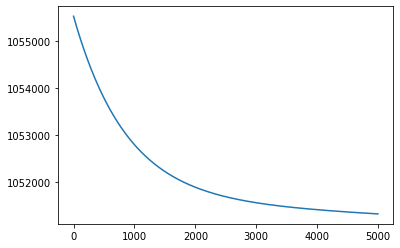

In [356]:
plt.plot(loss_history[5000:])

# Выводы

Сначала поисследовали данные и поняли, что они не очень:
1. 1ый и 2ой признаки очень скоррелированы и одинаково распределены (поэтому сразу решили, что выкинем один из них)
2. 4ый признак тоже скоррелирован с 1ым и со 2ым. Поэтому попробовали 2 варианта. Учиться с ним и учиться без него, графиги можно видеть выше
3. Поняли, что коэффициенты при обучении могут быть большими, так как x в основном маленький, а y бывает большим 

При обучении в обоих экспериментах начинаем с ооочень большой ошибки при разных инициализациях и даже после 10000 эпох лосс функция продолжает падать. Можно учить дальше, но я не совсем понимаю, как тут понимать не переучиваемся ли мы... 

Мы не бьём наши данные на тест, валидацию и трейн (и я не знаю, как это написать самому хорошо, без использования sklearn). Но скорее всего нет переобучения, так как у нас мало параметров у моодели - всего 5 (а выборка 10000) ещё и стоит регуляризация

Решила использовать метрику качества - MSE делить на кол-во точек, так как насколько мы хорошо прибижаем это есть среднеквадратичное отклонение по всем точкам

После исследования признаков понятно, что нужно выкинуть хотя бы 1, а лучше бы 2, но как порождать новые, не знаю(((

Ещё была идея отнормировать данные, чтобы не возникало больших коэф, но тоже не смогла это сделать